# Machine Learning: AllLife Bank Personal Loan Campaign

| Author Project Submission| Date |
| --- | --- |
| Sivaram Kumar Mani | May 31, 2025 |

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

### Development Environment
* Local development with Visual Studio Code.
* Jupyter Notebook and Python 3.11.7 with Anaconda3.
* Google Colab/Drive not used.
* Generated HTML using the jupyter cli

   ```jupyter nbconvert --to html PYF_Project_LearnerNotebook_FullCode.ipynb```
* Added --- (markdown) lines for easier readability for myself.

### Formatting Notes
* Added line separators for readability.

---
## Data & Environment Preparation

### Importing necessary libraries

In [381]:
# Installing the libraries with the specified version.
!pip install numpy  pandas matplotlib seaborn scikit-learn sklearn-pandas -q --user

# Visual Studio Code implementation using %pip.
# %pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [382]:
# Libraries to help with reading and manipulating data.
import pandas as pd
import numpy as np

# libaries to help with data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to help with data preprocessing.
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter

# Removes the limit for the number of displayed columns.
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows.
pd.set_option("display.max_rows", 200)

# To build model for prediction.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Import libraries for error handling
import warnings

# Import libraries for ML-scikit-learn
import sklearn.model_selection as sms
import sklearn.tree as ste
import sklearn.metrics as smt

#Import libraries for statistics
import scipy.stats as stt

# To tune different models.
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores.
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    classification_report,
)

# Suppress warnings (FutureWarning).
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)

### Loading the dataset

In [383]:
# Read the dataset from the Loan_Modelling.csv file locally. Pandas DataFrame object
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/pgaiml/machine-learning/Loan_Modelling.csv"

personal_load_df_original = pd.read_csv(path)

# copy of the original DataFrame to avoid modifying the original data.
personal_loan_df = personal_load_df_original.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
---
## Understanding the Structure of the Data
**Note:** All observations are summarized at the bottomn of the Data Overview section.

### Data Overview

* Observations
* Sanity checks

In [384]:
# Retrieve first 5 rows of the dataset.
print('First 5 rows of the dataset:')
print(personal_loan_df.head(5).to_string(index=False))

print()

# Retrieve last 5 rows of the dataset.
print('Last 5 rows of the dataset:')
print(personal_loan_df.tail(5).to_string(index=False))

First 5 rows of the dataset:
 ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  CreditCard
  1   25           1      49    91107       4    1.6          1         0              0                   1           0       0           0
  2   45          19      34    90089       3    1.5          1         0              0                   1           0       0           0
  3   39          15      11    94720       1    1.0          1         0              0                   0           0       0           0
  4   35           9     100    94112       1    2.7          2         0              0                   0           0       0           0
  5   35           8      45    91330       4    1.0          2         0              0                   0           0       0           1

Last 5 rows of the dataset:
  ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  Secur

In [385]:
# Number of rows and columns in the data using the shape attribute of the DataFrame.
rows, columns = personal_loan_df.shape

# Print the number of rows and columns from the dataset. Output is formatted into thousands.
# There are only 9 columns but for consistency, the output includes (,) format.
print(f'Number of Rows: {rows:,}')
print(f'Number of Columns: {columns:,}')

Number of Rows: 5,000
Number of Columns: 14


In [386]:
# Retrieve summary information of the DataFrame using the info() method.
personal_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [387]:
# Determine if there is any missing data.
missing_values = personal_loan_df.isnull().sum()

# Check for nulls and NaN values in the dataset.
print('Null values ' + str(personal_loan_df.isnull().sum()) + '\n')

print('NaN values ' + str(personal_loan_df.isna().sum()) + '\n')

# Output if there are any missing data points in the dataset.
if missing_values.sum() > 0:
    print('There are missing data points in the Personal Loan dataset.')
else:
    print('There are no missing data points in the Personal Load dataset.')

Null values ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

NaN values ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing data points in the Personal Load dataset.


In [388]:
# Using the describe() function with (include-'all').T can make the data more readable.
personal_loan_df.describe(include='all').T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [395]:
# Create a cross-tabulation of ZIP code and Education.
zip_education_crosstab = pd.crosstab(personal_loan_df['ZIPCode'], personal_loan_df['Education'])

# Filter rows where education level count is greater than 20.
zipcode_education_sorted = zip_education_crosstab[zip_education_crosstab > 20].dropna(how='all').fillna(0)

# Print the cross-tabulation of ZIP code and Education.
print('Cross-tabulation of ZIP code and Education:')
print(zipcode_education_sorted.to_string())

Cross-tabulation of ZIP code and Education:
Education     1     2     3
ZIPCode                    
90089      22.0   0.0   0.0
90095      25.0   0.0  26.0
90245       0.0   0.0  21.0
91320      22.0   0.0   0.0
92037      25.0   0.0   0.0
92121      25.0   0.0   0.0
93106       0.0   0.0  22.0
93943      28.0   0.0   0.0
94025       0.0   0.0  22.0
94305      51.0  40.0  36.0
94720      68.0  49.0  52.0
95616      47.0  36.0  33.0


In [396]:
# Check for zero or negative values in columns.
columns_to_check = ['Income', 'CCAvg', 'Mortgage','Securities_Account', 'CD_Account', 'Online', 'CreditCard']
for column in columns_to_check:
    invalid_values = personal_loan_df[personal_loan_df[column] <= 0]
    print(f'Number of rows with non-positive values in {column}: {len(invalid_values)}')

Number of rows with non-positive values in Income: 0
Number of rows with non-positive values in CCAvg: 106
Number of rows with non-positive values in Mortgage: 3462
Number of rows with non-positive values in Securities_Account: 4478
Number of rows with non-positive values in CD_Account: 4698
Number of rows with non-positive values in Online: 2016
Number of rows with non-positive values in CreditCard: 3530


In [397]:
# Display unique values in the dataset
personal_loan_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

---

### Observations

**Data Observations**
1. There are no missing data points in the Personal Load dataset.
2. Memory usage of the DataFrame is 547.0 KB.
3. Number of Rows: 5,000 and number of Columns: 14
4. There are no non-null vales in the Personal Loan dataset.
5. There are 3,462 customers that do no have a mortage.
6. Experience Has Negative Values.



---
## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?


## Univariat Analaysis ##




In [398]:
# This function plots the median bar along with the x and y description.
def histogram_with_median(data):
    x = np.random.randn(5000)
    ax = sns.histplot(data, kde = True,
             color='blue')
    x = ax.lines[0].get_xdata()
    y = ax.lines[0].get_ydata()
    plt.axvline(x[np.argmax(y)], color='red')
    plt.tight_layout()
    plt.figure(figsize = (15,15))

In [399]:
## This method is used function will plot percentages on the bar graphs
## It takes the  graph object, feature, Number_of_categories in feature, and hue_categories as  parameters.
def display_bar_with_percent(axes_obj, feature, number_of_categories, hue_categories):
    a = [p.get_height() for p in axes_obj.patches]
    patch = [p for p in axes_obj.patches]
    for i in range(number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*number_of_categories + i)] / total) # calculate percentage.
            x = patch[(j * number_of_categories + i)].get_x() + patch[(j * number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j * number_of_categories + i)].get_y() + patch[(j * number_of_categories + i)].get_height()
            axes_obj.annotate(percentage, (x, y), size = 12)


In [402]:
def box_plot_with_median(data,attribute):
  # Set the figure size
  plt.figure(figsize=(8, 6)) # width, height in inches
  ax =sns.boxplot(data=data,x=attribute, color="blue",medianprops = {'color': 'r'})
  plt.show()
def plot_histogram_box(data,attribute):
  print(f"Minimum Value : {data[attribute].min()}")
  print(f"Maximum Value : {data[attribute].max()}")
  print(f"Mean Value : {round(data[attribute].mean(),2)}")
  print(f"Median Value : {round(data[attribute].median(),2)}")
  histogram_with_median(data[attribute])
  box_plot_with_median(data,attribute)

### Univariat Analysis : Age ###

Minimum Value : 23
Maximum Value : 67
Mean Value : 45.34
Median Value : 45.0


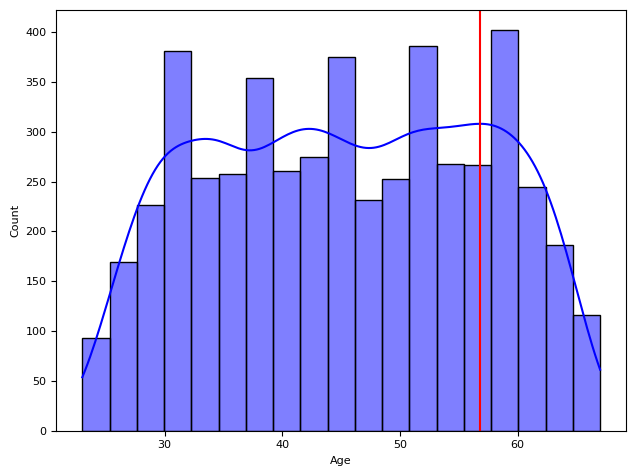

<Figure size 1500x1500 with 0 Axes>

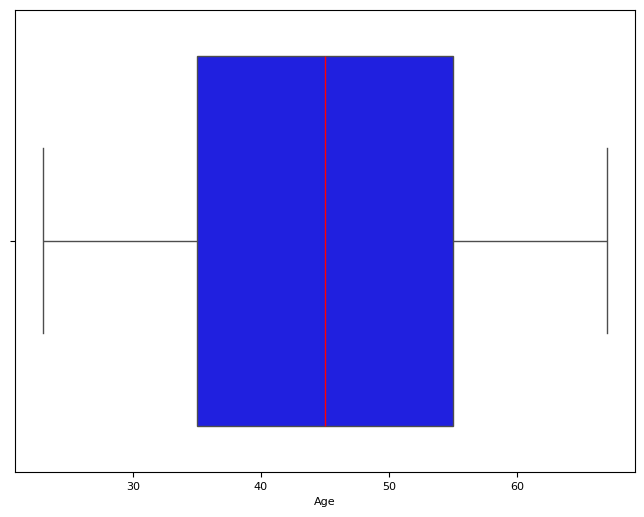

In [403]:
plot_histogram_box(personal_loan_df,'Age')

---

**Observation**

1. The min is 23 , max is 67 , Average is 45 Years old - Data seems is slightly fitting a uniform distribution.
2. The maximum number of clients is within the 58-60 years old range, there are also peak counts at 30-32, 38-40, 44-46 and 52-54 years old There are no outliers observed.



---


### Univariat Analysis :  Experience ###

Minimum Value : -3
Maximum Value : 43
Mean Value : 20.1
Median Value : 20.0


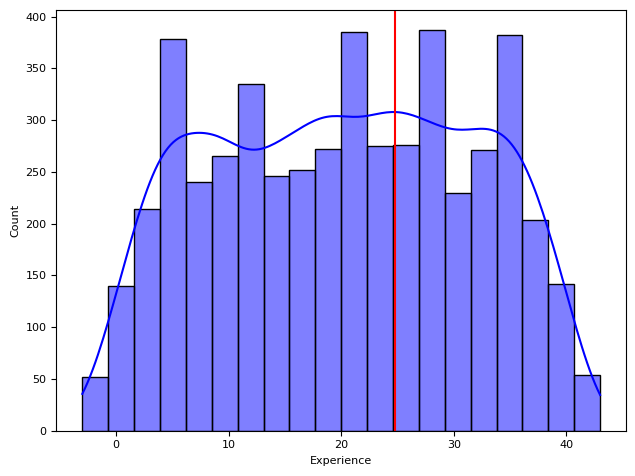

<Figure size 1500x1500 with 0 Axes>

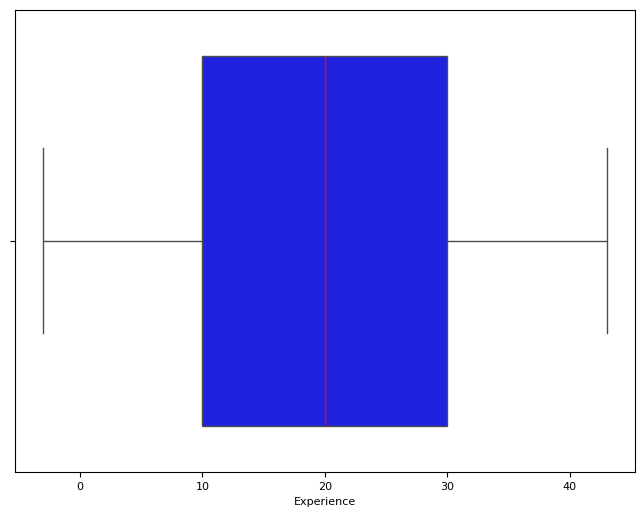

In [404]:
plot_histogram_box(personal_loan_df,'Experience')

There are 4948 customers with Positive experience values : 99% of the dataset
Minimum Value : 0
Maximum Value : 43
Mean Value : 20.33
Median Value : 20.0


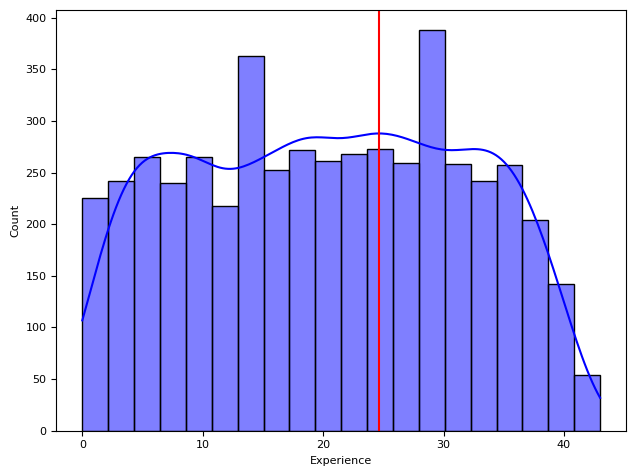

<Figure size 1500x1500 with 0 Axes>

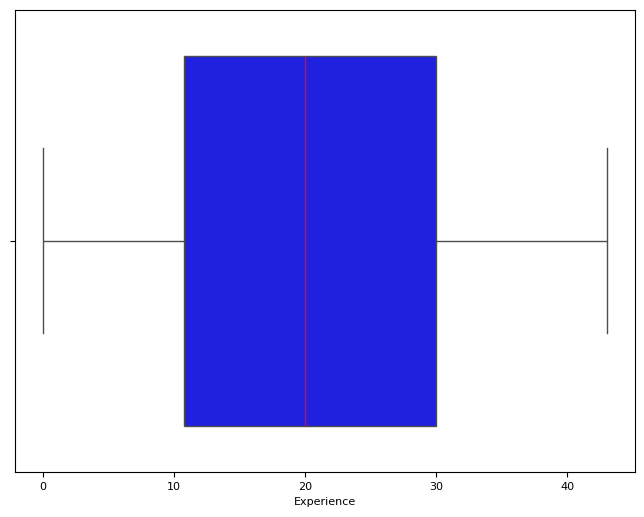

In [405]:
#extracting the customers with non negative experienced values
experienced = personal_loan_df[personal_loan_df['Experience']>=0]
print(f'There are {len(experienced)} customers with Positive experience values : {round((len(experienced)/5000)*100)}% of the dataset')
plot_histogram_box(experienced,'Experience')

**Observation**

1. The min Experience is -3 years, the max is 43 and the mean is approximatly 20 years.  There are rows with negative experience values.
2. If rows with negative values are removed, mean doesnot change much
2. The data is almost fitting a uniform distribution with peaks at 12-14 years and 28-30 years
3. There are no outliers observed



### Univariat Analysis : Income ###

Minimum Value : 8
Maximum Value : 224
Mean Value : 73.77
Median Value : 64.0


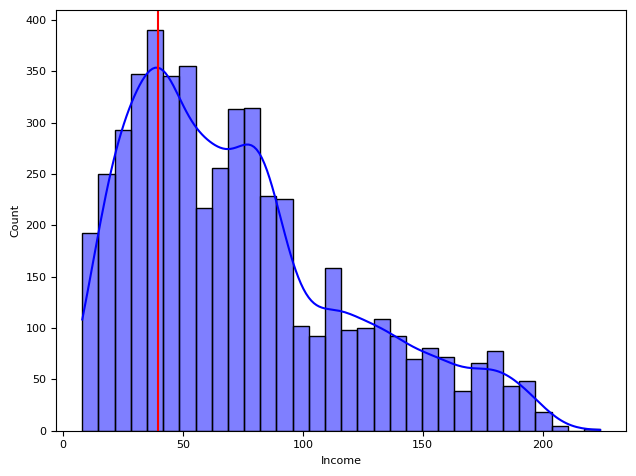

<Figure size 1500x1500 with 0 Axes>

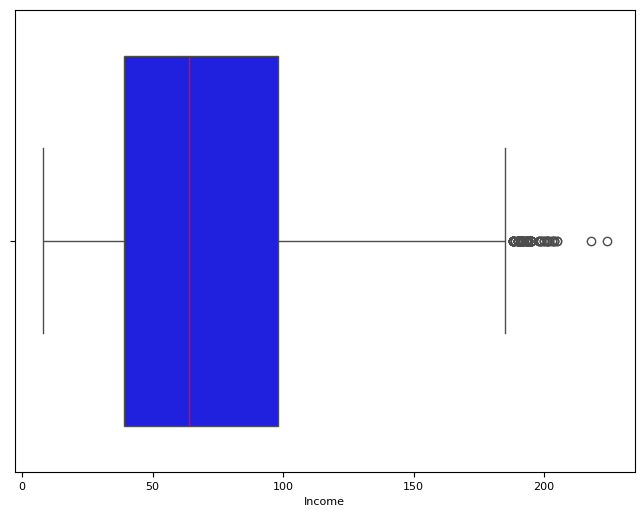

In [406]:
plot_histogram_box(personal_loan_df,'Income')

---

**Observations**
1. The min Income is USD 8k, max is USD 224K and average is approximately USD 73K - Dataset is right skewed
2. There are number of outliers, yet they seem consistent with the data hence no action is required for outlier treatment



### Univariat Analysis : CCAvg

Minimum Value : 0.0
Maximum Value : 10.0
Mean Value : 1.94
Median Value : 1.5


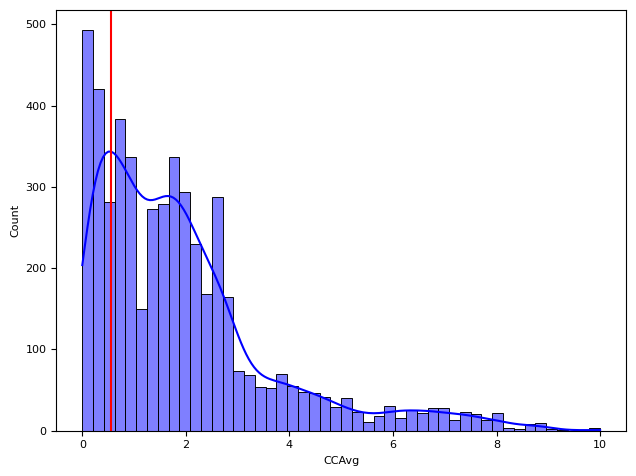

<Figure size 1500x1500 with 0 Axes>

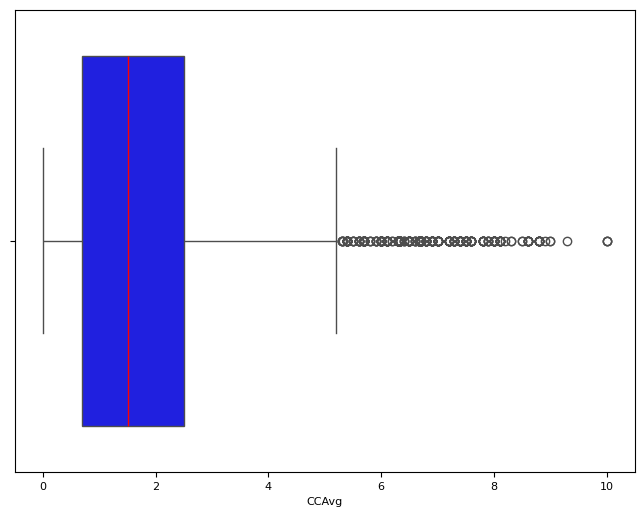

In [407]:
plot_histogram_box(personal_loan_df,'CCAvg')

---


**Observations**

1. The min CCAvg is USD 0k (which can be reflecting customers who do not own credit cards), max is USD 10K and average is approx USD 1.9K
2. Dataset is right skewed with a number of outliers that seem homogenous with the data, hence no action required for the outliers



### Univariat Analysis : Mortgage

Minimum Value : 0
Maximum Value : 635
Mean Value : 56.5
Median Value : 0.0


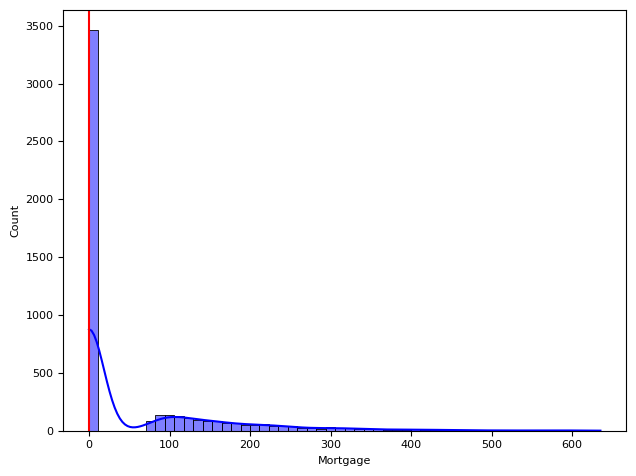

<Figure size 1500x1500 with 0 Axes>

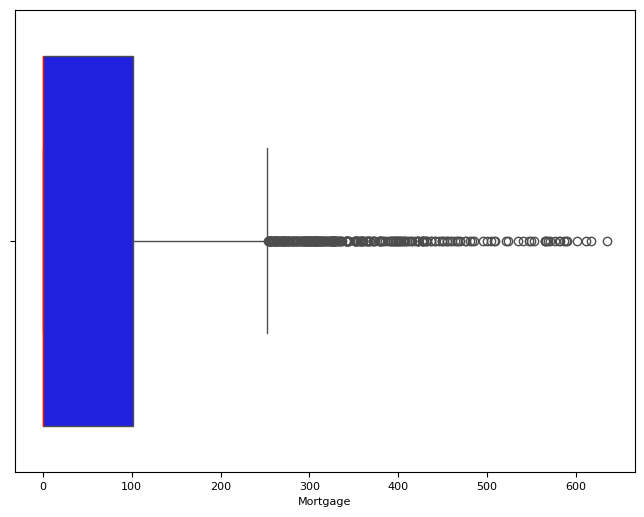

In [408]:
plot_histogram_box(personal_loan_df,'Mortgage')

In [409]:
# Number of customers with no mortgage.
no_mortgage_count = personal_loan_df[personal_loan_df['Mortgage'] == 0].shape[0]

# Total number of customers.
total_customers = personal_loan_df.shape[0]

# Percentage of customers with no mortgage.
percentage_no_mortgage = (no_mortgage_count / total_customers) * 100

print(f"Number of customers with no mortgage: {no_mortgage_count:,}")
print(f"Number of customers with mortgage: {total_customers-no_mortgage_count:,}")
print(f"Total number of customers: {total_customers:,}")
print(f'Percentage of customers with no mortgage: {percentage_no_mortgage:.2f}%')

Number of customers with no mortgage: 3,462
Number of customers with mortgage: 1,538
Total number of customers: 5,000
Percentage of customers with no mortgage: 69.24%


**Observations**
1. Number of customers with no mortgage: 3,462
2. Number of customers with no mortgage: 1,538
3. The min Mortgage is USD 0k, max is USD 635K and average is USD 56.49K - Dataset heavily right skewed
4. To visualize better, we will separate the USD 0k mortgage from the > USD 0K mortgage and plot the data again



There are 1538 customers under mortgage and forms 31% of the dataset
Minimum Value : 75
Maximum Value : 635
Mean Value : 183.68
Median Value : 153.0


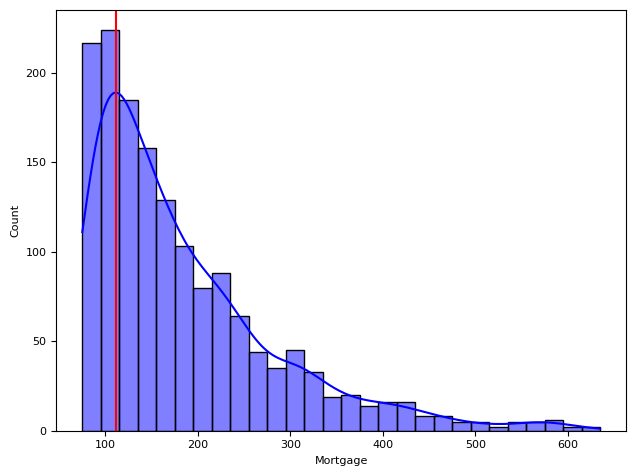

<Figure size 1500x1500 with 0 Axes>

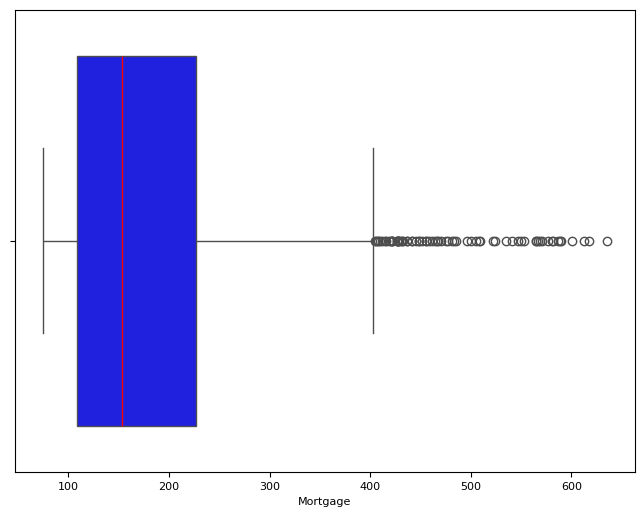

In [410]:
#extracting the customers with mortgage values > 0
mortgage = personal_loan_df[personal_loan_df['Mortgage']>0]
print(f'There are {len(mortgage)} customers under mortgage and forms {round((len(mortgage)/5000)*100)}% of the dataset')
plot_histogram_box(mortgage,'Mortgage')

**Observations**
Considering all customers who have mortgage,
1. The min Mortgage is USD 75k, max is USD 635K and average is USD 183.67K
2. Dataset heavily right skewed


### Analysing categorical data

Family size, Education, Personal_Loan, CD_Account, Online and CreditCard are categorical in nature, hence we will define and apply a function to plot a labelled barplot for each variable

In [416]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Blues",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Family

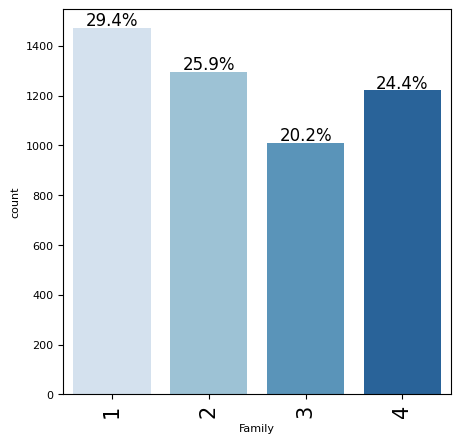

In [417]:
labeled_barplot(personal_loan_df,'Family',perc=True)

---


**Observarions**

The majority of Family sizes (29.4%) is size 1, followed by (25.9%) of size 2 then (24.4%) of size 4 and finally (20.2%) of size 3.

---


### Education

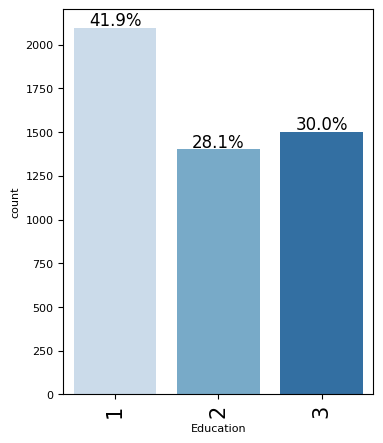

In [419]:
labeled_barplot(personal_loan_df,'Education',perc=True)

### Personal Loan

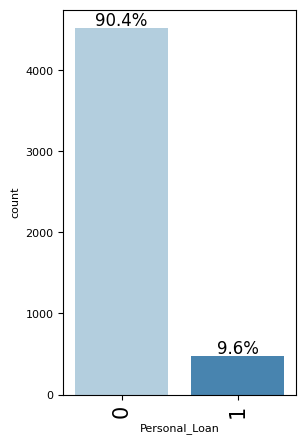

In [420]:
labeled_barplot(personal_loan_df,'Personal_Loan',perc=True)

**Observations**


  - 90.4% of customers Did not accept a loan
  - 9.6% of customers accepted a loan

Note! This mismatch needs to be considered while training the model


### CD_Account

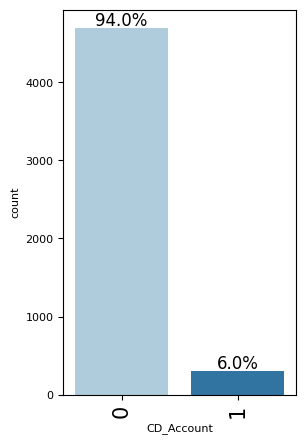

In [200]:
labeled_barplot(personal_loan_df,'CD_Account',perc=True)

**Observations**

 - 94% of customers Do Not have a CD_Account
 - 6% only have a CD_Account

### Online

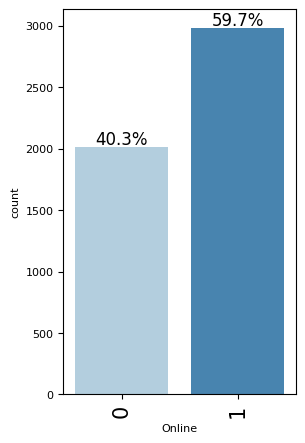

In [421]:
labeled_barplot(personal_loan_df,'Online',perc=True)

**Observations**

-  59.7% of customers use the online banking services
- 40.3% of customers do not use the online banking services



### CreditCard

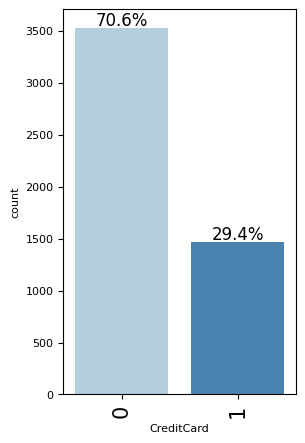

In [422]:
labeled_barplot(personal_loan_df,'CreditCard',perc=True)

---

**Observations**

- 70.6% of customers do not use a credit card issued by a different bank
- 29.4% of customers use a credit card issued by a different bank



---



## Bivariate analysis

Correlation between columns

<Figure size 1500x1500 with 0 Axes>

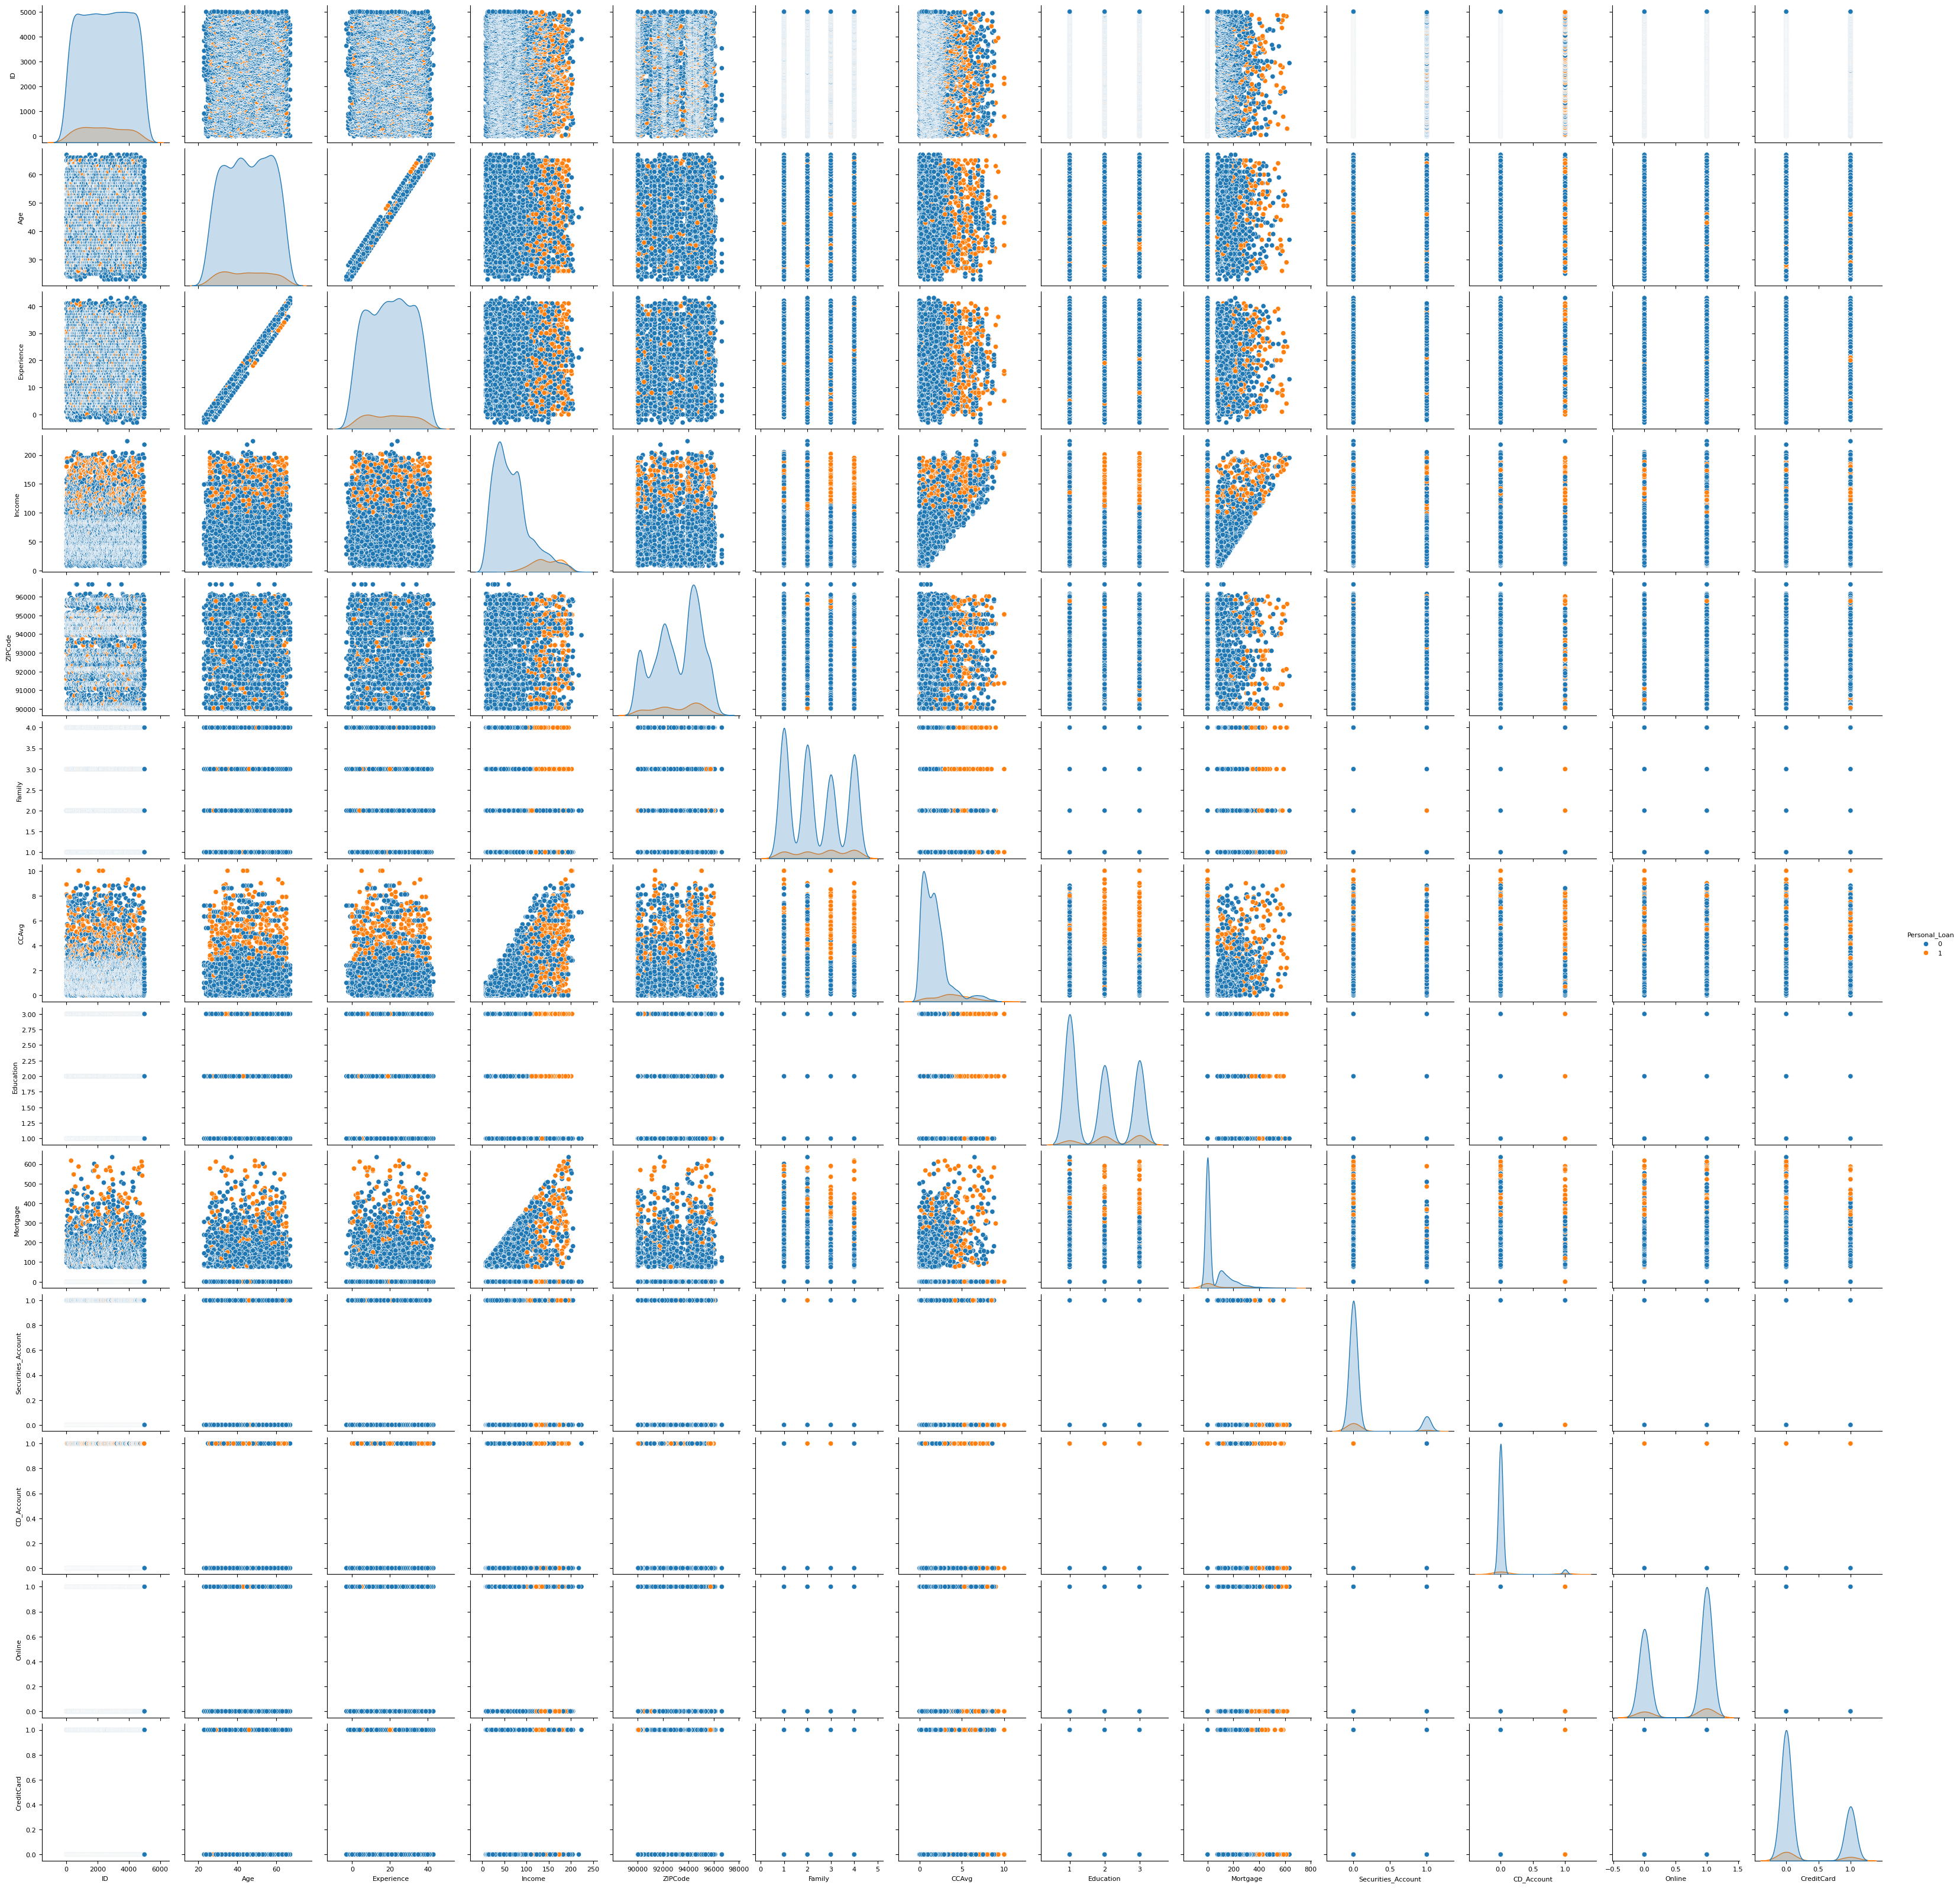

In [423]:
plt.figure(figsize=(15,15))
sns.pairplot(personal_loan_df, hue="Personal_Loan")
plt.show()



---



**Observations**

1. The orange spots present the customers who accepted a personal_loan and the
blue spots show the ones who did not.
2. From the univariate analysis of the personal_loan dataset it was observed that only 9.6% of the customers accepted the personal loan, hence this observation is consistent with the pair plot where the majority of the spots are blue
3. It is observed that there is a very strong linear corelation between Age and Experience
4. It is observed that there is a slight correlation between Income and CCAvg
5. High concentraion of customers who accepted a personal loan are observed at:
  Higher Income level (starting at approx USD 100K and above)
  Higher CCAvg (starting at approx USD 3K and above)
  Higher Mortgage value (starting at approx USD 300K and above)
  Customers with CD_Accounts
  Customers who use credict cards issued from other banks
  Famillies with sizes 3 or 4
  Customers with Eductaion 2(graduate) or 3 (advanced/professional)

Hence, we do have an idea to expect the abova variables to have a medium to high prediction power on the classification models.




---



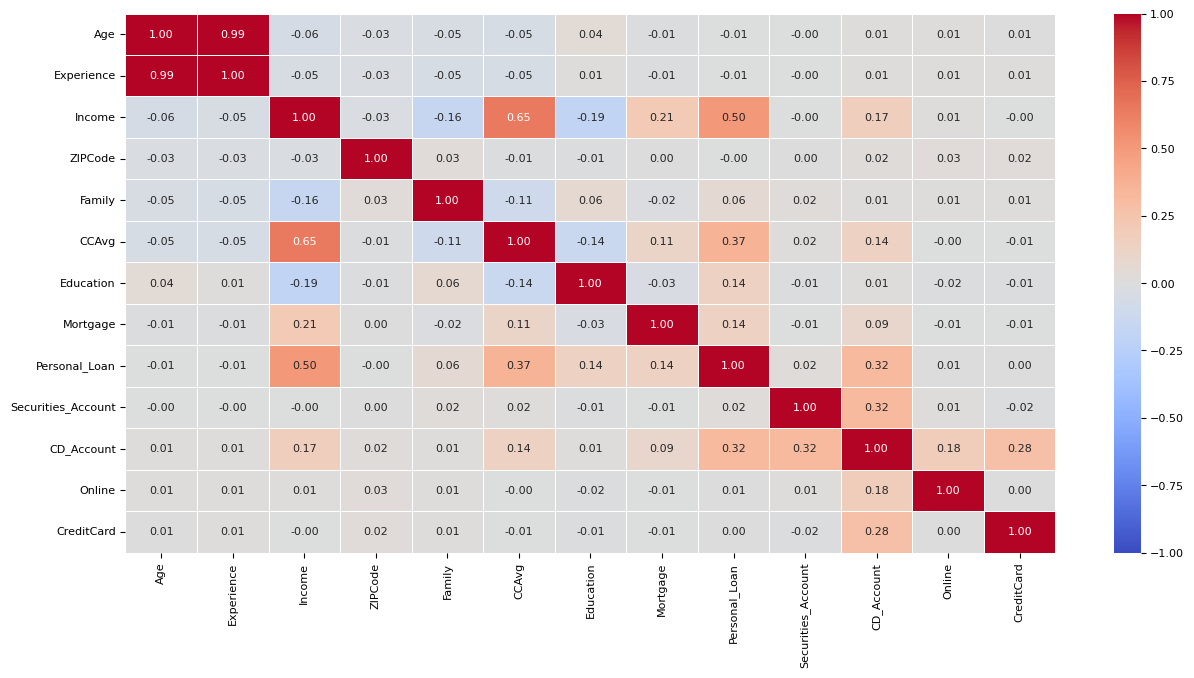

In [425]:
# Plot the correlation matrix as a heatmap.
plt.figure(figsize=(15, 7))
# ignoring the ID column
sns.heatmap(personal_loan_df.drop(columns=['ID']).corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()


**Observations**

1. The correlation heatmap supports the correlation observed in the pairplot
2. Age and Experience are perfectly correlated, so one of them can be droped

## 1. Plotting the target VS distribution of numerical variables

In [474]:
### function to plot distributions wrt target (Pesonal_Loan)
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()
    axs[0, 0].set_title(f"Distribution of {predictor} for {target}=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title(f"Distribution of {predictor} for {target}=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title(f"Boxplot w.r.t {target}")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title(f"Boxplot (without outliers) w.r.t {target}")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Age VS Personal_Loan

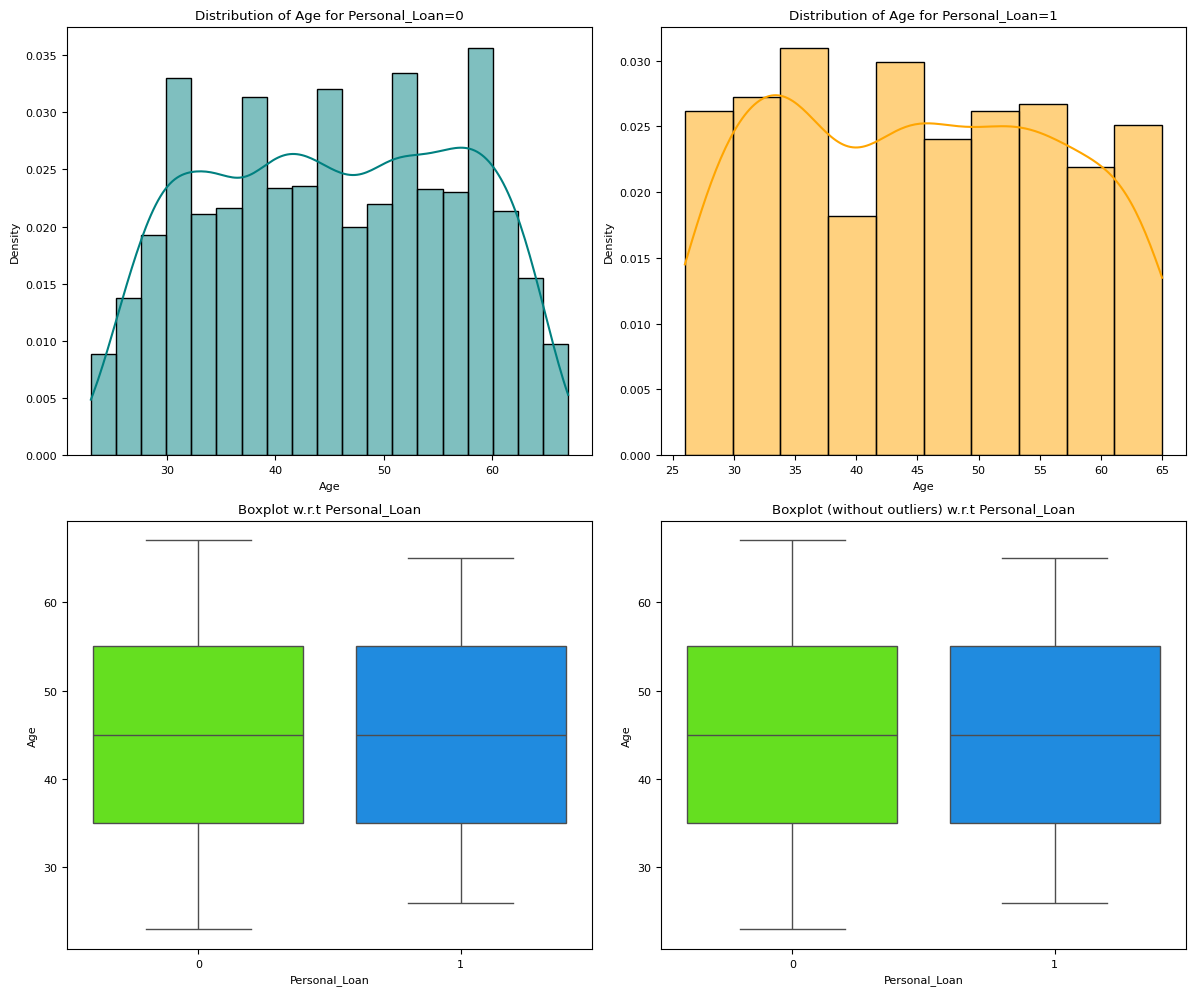

In [475]:
distribution_plot_wrt_target(personal_loan_df,'Age','Personal_Loan')


**Observations**


1. It is observed that the mean age for customers accepting and not accepting personal loans is very close to the value 45 years.
2. As expected from the pair plot Age does not have a relation with our target variable, hence a negligible prediction power



### Experience VS Personal_Loan

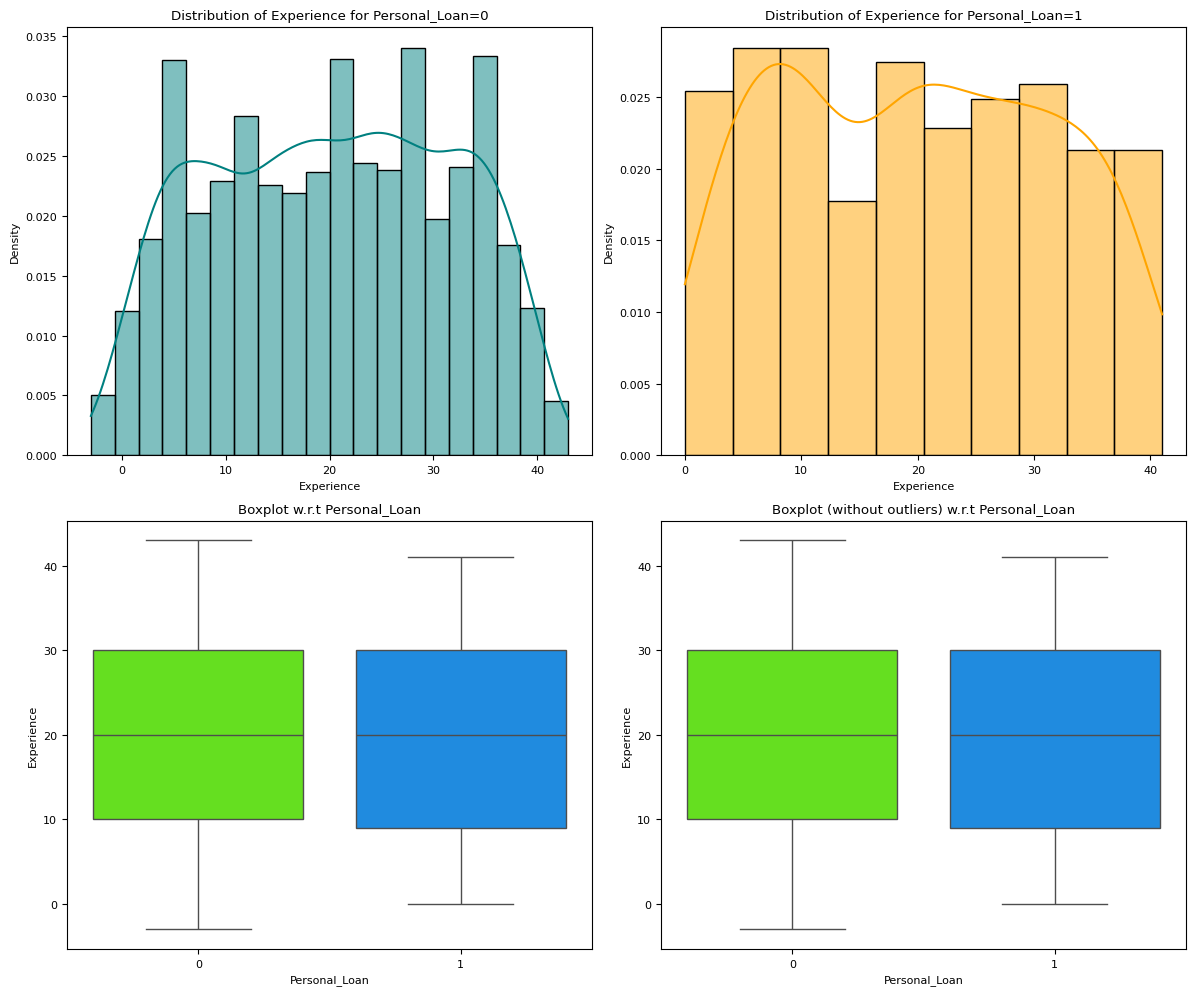

In [476]:
distribution_plot_wrt_target(personal_loan_df,'Experience','Personal_Loan')

**Observations**


1. It is observed that the mean Experience for customers accepting and not accepting personal loans is very close to the value 20 years
2. As expected from the pair plot, Experience does not have a relation hence a prediction power on our target variable



### Income VS Personal_Loan

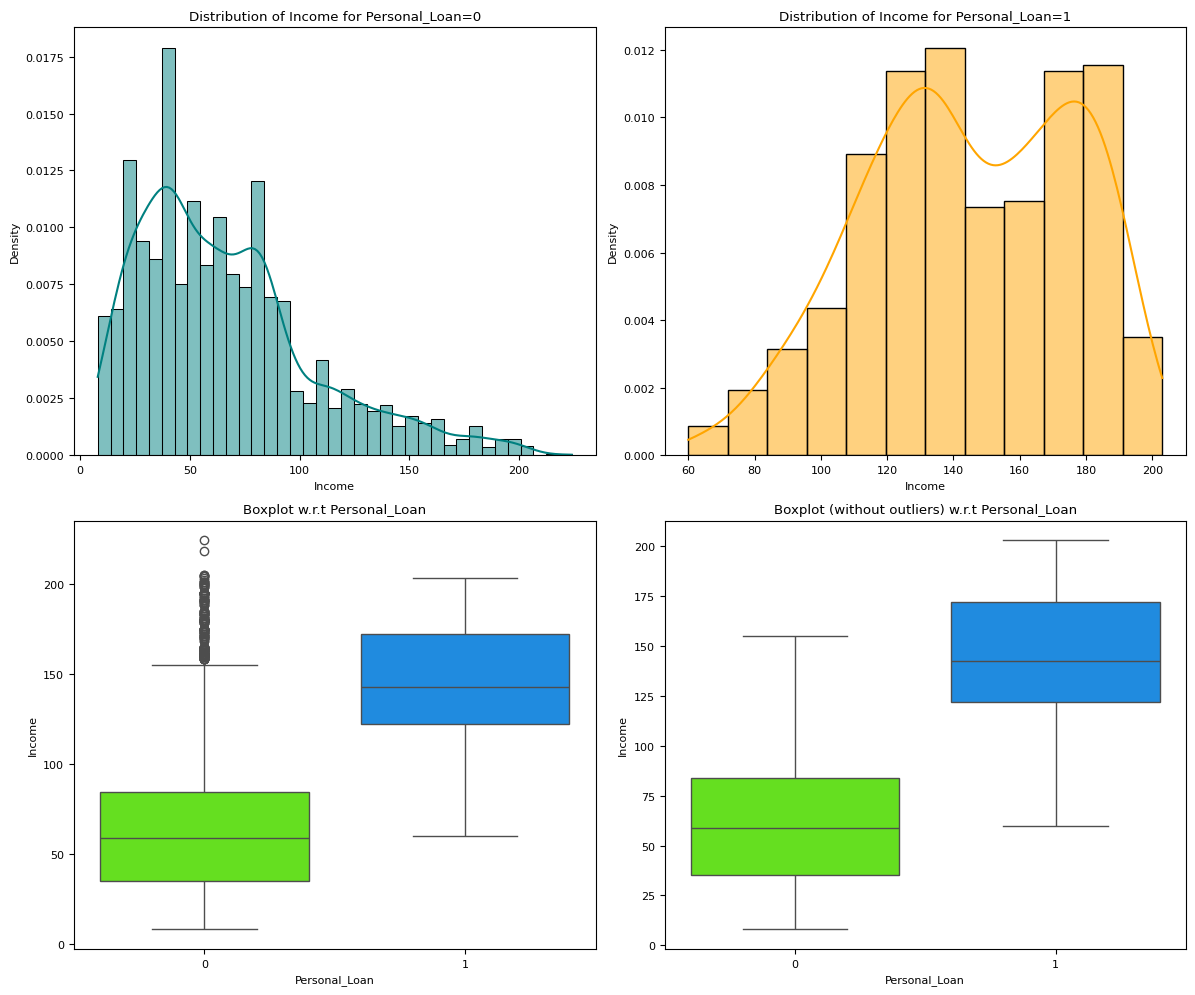

In [477]:
distribution_plot_wrt_target(personal_loan_df,'Income','Personal_Loan')

**Observations**

1. As expected, The Income variable varies greatly between customers who accepted and not accepted the personal loan.
2. The mean income for the customers who did not accept the loan is approx USD 65K
3. The mean income for the customers who did accept the loan is approx USD 145K
This shows that the income level of the customer has a high impact on the customer decision to accept a personal loan, The higher the income, the more chances the customer will accept a personal loan

---

#### Mortgage VS Personal_Loan

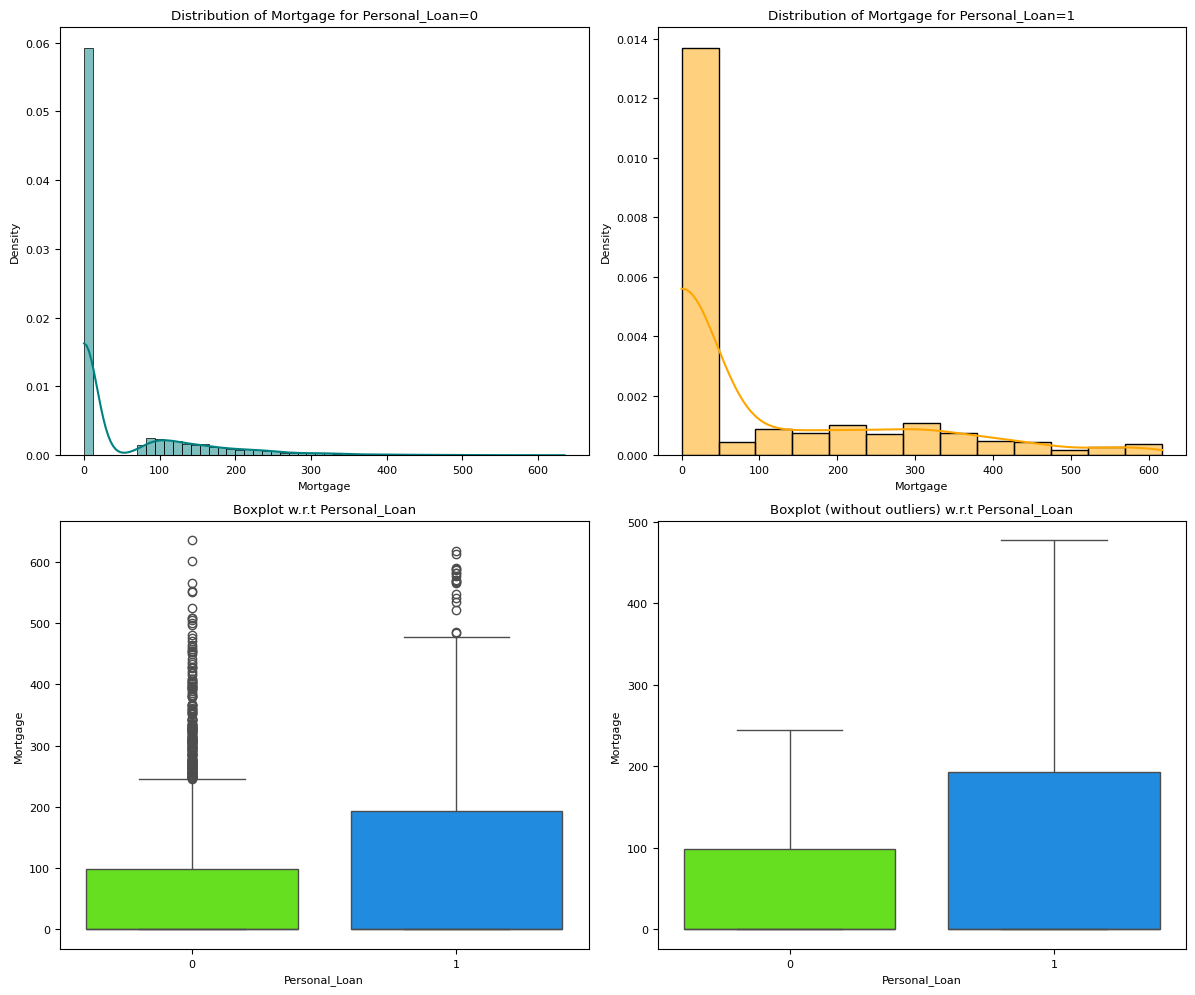

In [478]:
distribution_plot_wrt_target(personal_loan_df,'Mortgage','Personal_Loan')

**Observations**
It is observed that the customers paying mortage are more likely to accept personal loan, yet As the variable distribution is heavily right skewed due to the high number of customers not paying mortgage, we will plot the distribution of the customers paying mortgage only which are consolidated in the dataframe mortgage. This will give us a better insight on the mortgage mean value for customers accepting vs custmers not accepting a personal loan.

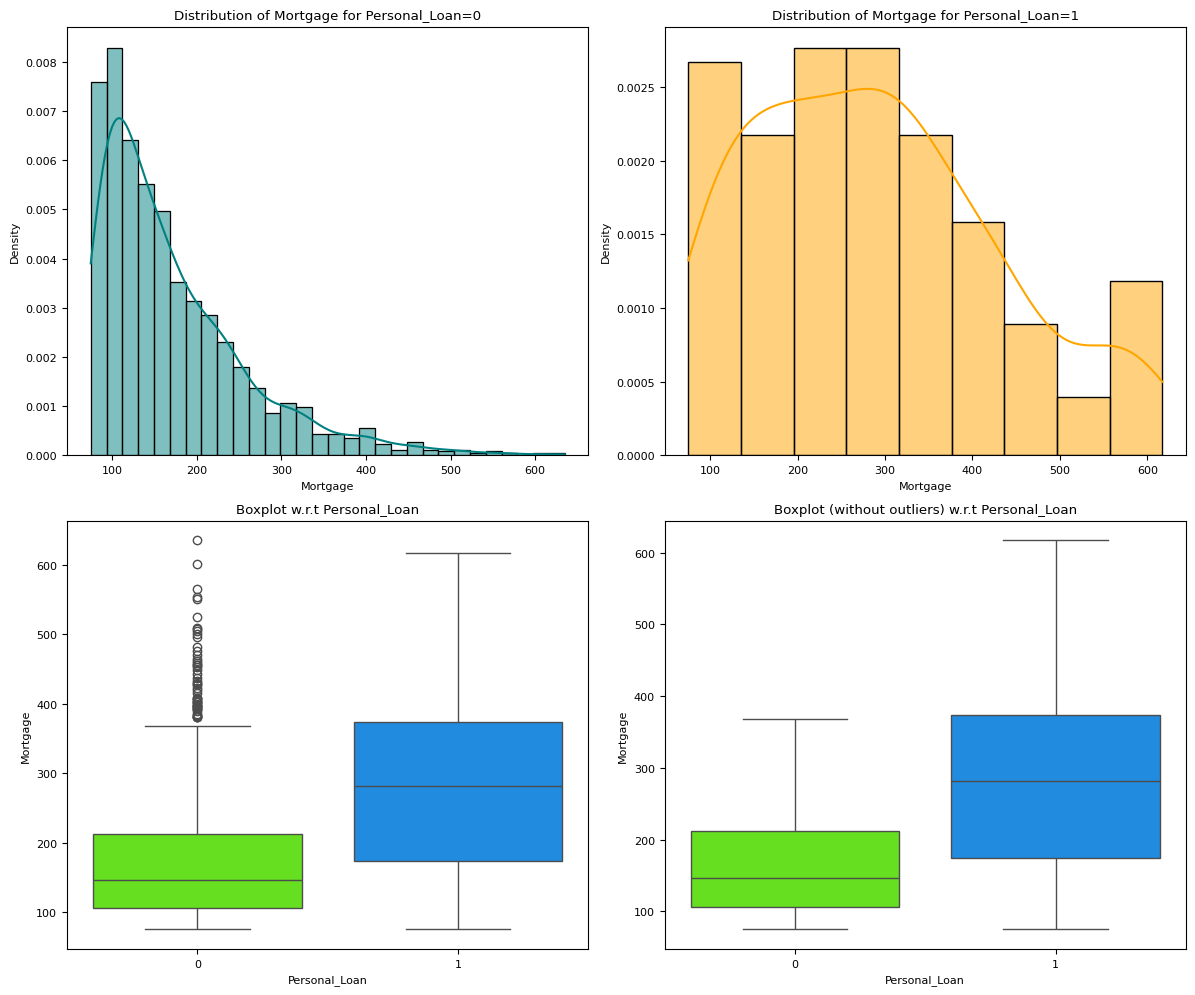

In [479]:
distribution_plot_wrt_target(mortgage,'Mortgage','Personal_Loan')

**Observations**
1. The mean value of mortgage paid by customers not accepting a personal loan is approx USD 150K USD which is much less than the mean value of customers accepting personal loan of approx USD 290K.  
2. As mortgage value increase, the customer is more likely to accept a personal loan

#### CCAvg VS Personal_Loan

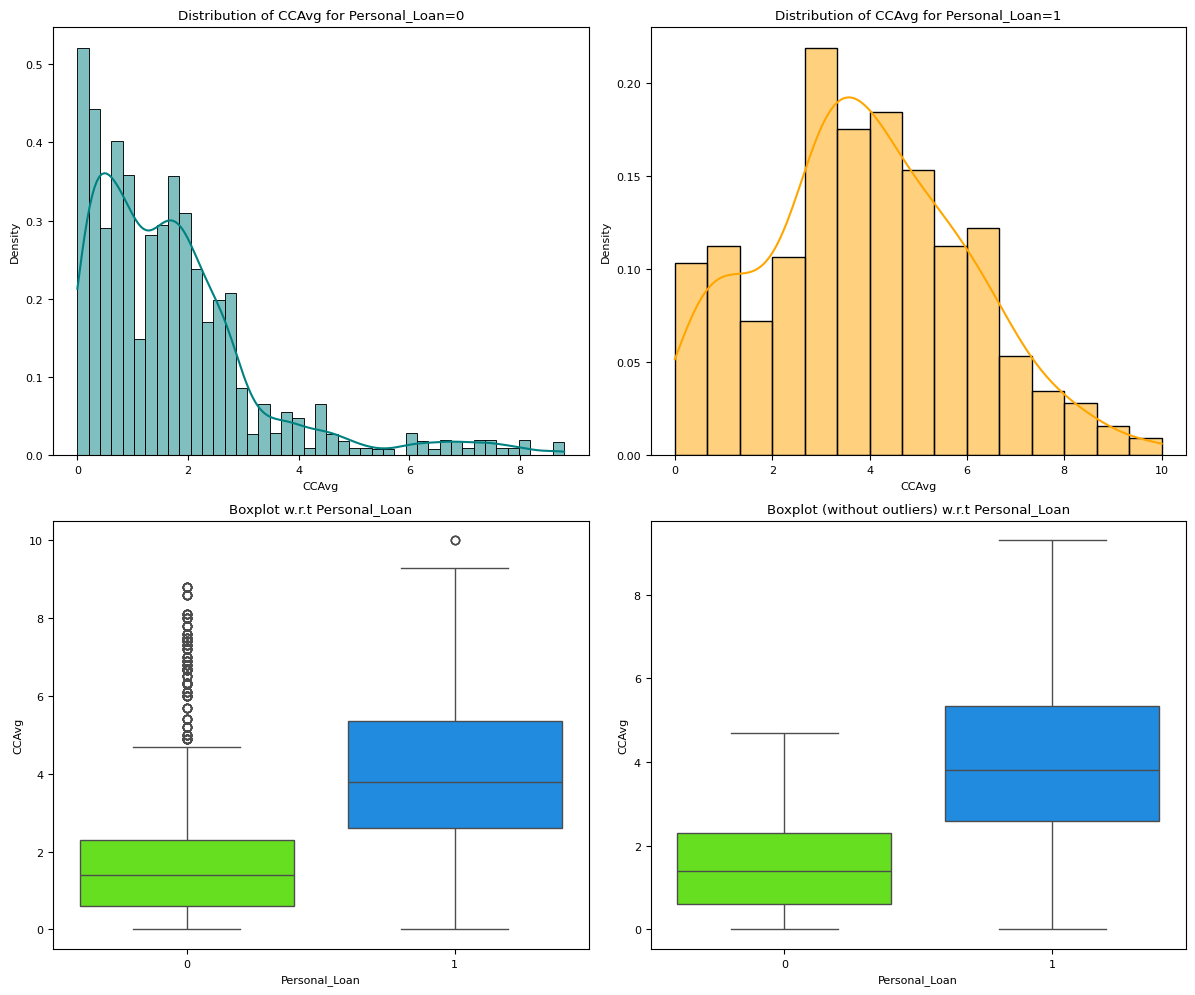

In [480]:
distribution_plot_wrt_target(personal_loan_df,'CCAvg','Personal_Loan')

**Observations**
1. mean value of CCAvg of customers not accepting a personal loan is approx USD 1.6 K USD much less than the mean value of customers accepting personal loan of approx USD 4K.
2. customers who accept personal loan spends more money on monthly basis

### 2. Plotting the target VS distribution of categorical variables

In [483]:
# # function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart with % labels
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Print absolute counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Normalized table for plotting
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Blue color palette
    blue_colors = sns.color_palette("Blues", n_colors=tab.shape[1])

    # Plot
    ax = tab.plot(kind="bar", color=blue_colors, stacked=True, figsize=(count + 5, 6))

    # Add labels
    for i, bar_group in enumerate(ax.containers):
        for bar in bar_group:
            height = bar.get_height()
            if height > 0.01:  # Avoid labeling tiny values
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    f'{height * 100:.1f}%',
                    ha='center',
                    va='center',
                    fontsize=9,
                    color='white'
                )

    # Legend and layout
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title=target)
    plt.ylabel("Proportion")
    plt.xlabel(predictor)
    plt.title(f"Distribution of {target} by {predictor}")
    plt.tight_layout()
    plt.show()

### Family VS Personal_Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


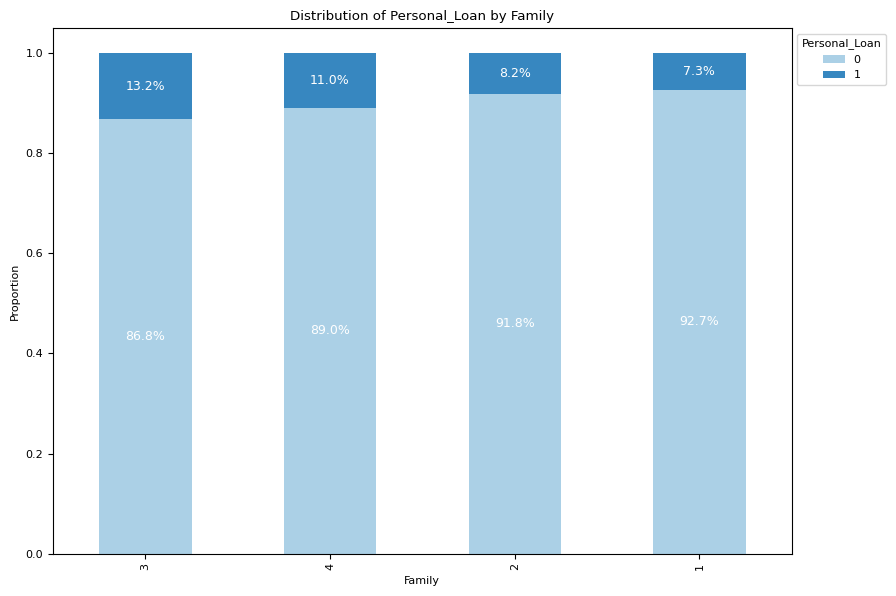

In [465]:
stacked_barplot(personal_loan_df,'Family','Personal_Loan')

**Observations**

1. Families of size 3 or 4 have more proportion of accepting a personal loan.
2. Hence Larger the family size, customers are more likely to accept personal loans

### Education VS Personal_Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


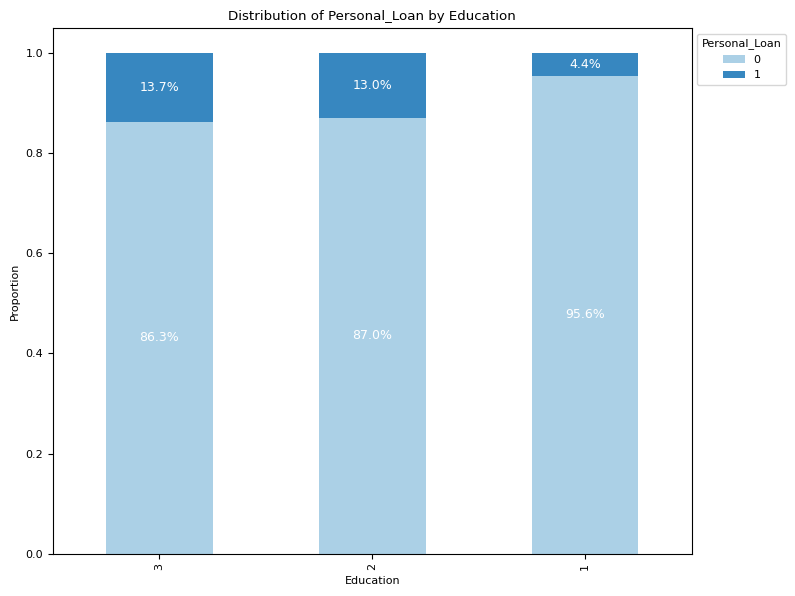

In [466]:
stacked_barplot(personal_loan_df,'Education','Personal_Loan')

**Observations**
- Customers with Eduaction level 3 and 2 are more likely to accept the loan

### Securities_Account VS Personal_Loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


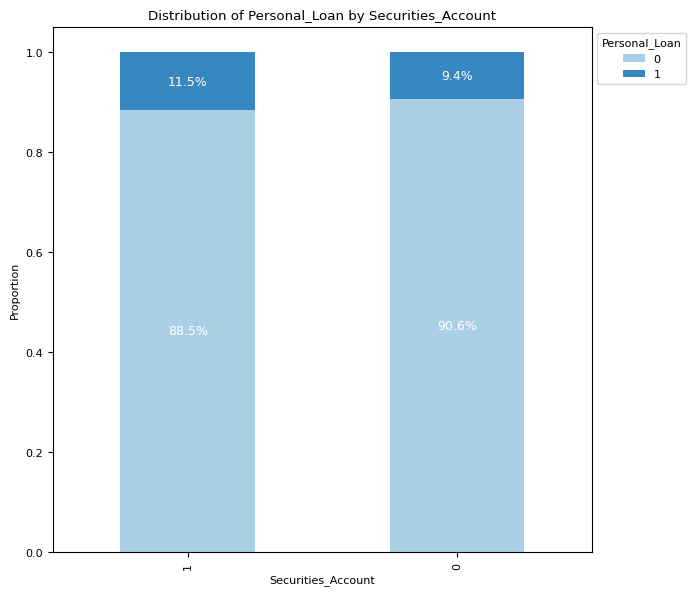

In [467]:
stacked_barplot(personal_loan_df,'Securities_Account','Personal_Loan')

**Observations**

 1. customers with Security account are more willing to accept a personal loan
---


### CD_Account VS Personal_Loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


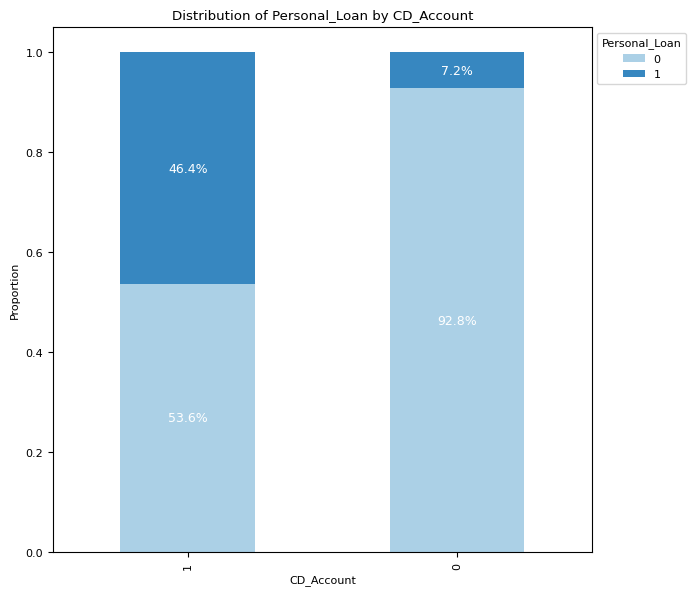

In [468]:
stacked_barplot(personal_loan_df,'CD_Account','Personal_Loan')

**Observations**
1. customers with CD_account are more willing to accept a personal loan

### Online VS Personal_Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


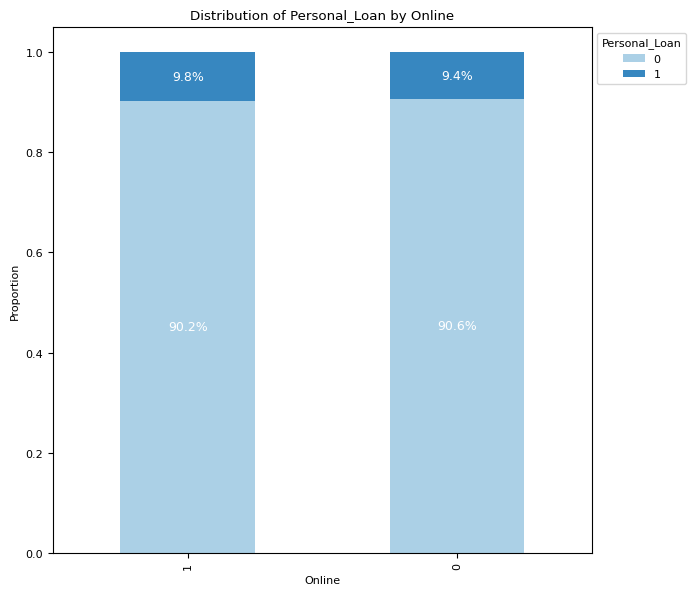

In [469]:

stacked_barplot(personal_loan_df,'Online','Personal_Loan')

**Observations**
1. Customers who use internet banking services and who do not use internet banking services are almost equally likely to accept personal loans

#### CreditCard VS Personal_Loan

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


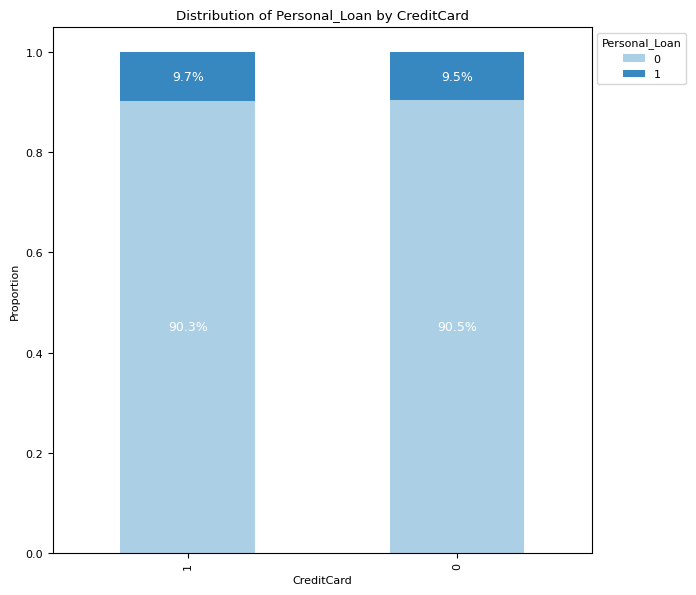

In [470]:
stacked_barplot(personal_loan_df,'CreditCard','Personal_Loan')

**Observations**
1.  customers having or not having credit cards does not affect the outcome of accepting a loan.


**Key observations on the univariate analysis:**

1. The min Age is 23 , max is 67 , Average is 45 Years old - Data seems is slightly fitting a uniform distribution.
2. The min Experience is 0 years, the max is 43 and the mean is approximatly 20 years.
3. The min CCAvg is USD 0k (which can be reflecting customers who do not own credit cards), max is USD 1.9K and average is USD 10K
4. 69% of the customers are not paying mortage and the remainig 31% paying minimum value of approx 99K to max value of 635K and mean value between USD 180-200K for mortage
5. The majority of Family sizes (29.4%) is size 1, followed by (25.9%) of size 2 then (24.4%) of size 4 and finally (20.2%) of size 3.
6. Customer Education is distributed as follow:
    - 41.9% of customers are 1: Undergrad
    - 28.1% of customers are 2: Graduate
    - 30.0% of customers are 3: Advanced/Professional

7. A total of 94% of customers Do Not have a CD_Account and 6% only have a CD_Account
8. A total of 40.3% of customers do not use the online banking services and 59.7% do.
9. A total of 70.6% of customers do not hold a credit card and 29.4% of customers hold credit cards,
10. The target variable Personal_Loan shows 90.4% of customers Did not accept a loan and 9.6% of customers accepted a loan

**Key Observations on the multivariate analysis**

1. The correlation between Age and Experience is very high (value = 0.98)
2. The correlation between Income and CCAvg is low (value = 0.65)
3. All other correlation values are quiet small for consideration

* The effect of variables on the target variable *

Summed up in the below table, the independent variables and how do they affect the target variable.

|Variable | Effect on Target Variable |
|------|--------|
| Income 	| The higher the income, the more chances the customer will accept a personal loan|
| Family 	| As familly size grows, customers are more willing to accept personal loans|
| CCAvg 	| As the monthly spending of customers increase, the more they are willing to accept personal loan|
| Education | 	As the Education level of the customers increase, they are more willing to accept a personal loan|
| Mortgage 	| As the mortgage value increase, the customer is more likely to accept a personal loan|
| Securities_Account 	| customers with Security account are more willing to accept a personal loan|
| CD_Account 	| Customers with CD_account are more willing to accept a personal loan|
| Online 	| No observed effect on the target variable|
| Age 	| No observed effect on the target variable|
| Experience 	| No observed effect on the target variable|
| CreditCard 	| No observed effect on the target variable|

**Expected target dependencies**

1. Low importance is expected for the variables: Age, Experience, Credit card and Online
2. High to mediam importance is expected for Income, Familly, CCAvg, Education, Mortgage, Security Account and CD_Account





---


#### **Question 1.** What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

**Observations**
Based on Univariat analysis for Mortgage in Section Univariat Analysis,
1. Number of customers with no mortgage: 3,462
2. Number of customers with no mortgage: 1,538
3. The min Mortgage is USD 0k, max is USD 635K and average is USD 56.49K - Dataset heavily right skewed
4. Mortgage column is heavily right skewed
5. 69.24% of customers do not have a mortgage ($0). This is a significant number within the overall customer base.


Considering the customers with Mortgage
1. Mortgage column is still heavily right skewed
2. Considering all customers who have mortgage, The min Mortgage is USD 75k, max is USD 635K and average is USD 183.67K

* It is observed that the customers paying mortage are more likely to accept personal loan



---

#### **Question 2.** How many customers have credit cards?

In [484]:
# Total number of customers.
total_customers = personal_loan_df.shape[0]

# Number of customers with credit cards from All Life Bank and other banks.
other_cc = personal_loan_df[personal_loan_df['CreditCard'] == 1].shape[0]
all_life_bank_cc = personal_loan_df[personal_loan_df['CreditCard'] == 0].shape[0]

print(f'Total number of customers with Credit Card: {(other_cc+other_cc):,}')
print(f'Number of customers with All Life Bank credit card: {all_life_bank_cc:,}')
print(f'Number of customers using a credit card at another bank: {other_cc:,}')
print(f'Total number of customers: {total_customers:,}')
print(f'Percentage of customers with credit cards from AllLife: {(all_life_bank_cc / total_customers * 100):.2f}%')
print(f'Percentage of customers with credit cards from other bank: {(other_cc / total_customers * 100):.2f}%')

Total number of customers with Credit Card: 2,940
Number of customers with All Life Bank credit card: 3,530
Number of customers using a credit card at another bank: 1,470
Total number of customers: 5,000
Percentage of customers with credit cards from AllLife: 70.60%
Percentage of customers with credit cards from other bank: 29.40%


---

**Observations**
1. There are 2,940 Customers with Credit Cards
2. 3,530 Customers have credit card from AllLife. 70.60% of customers have CC from AllLife bank
3. 1470 Customers have credit card from Other Banks. 29.4% of customers have credit cards from other banks.
    * **Recommendation:** Market a special program with low introductory APR to capture business away from competitors.

---

In [485]:
# Find correlation between the variables in the dataset.
personal_loan_df.corr()

ID       Age  Experience    Income   ZIPCode  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.002240   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.030530   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.030456   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.030709   
ZIPCode             0.002240 -0.030530   -0.030456 -0.030709  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.027512   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.012188   
Education           0.021463  0.041334    0.013152 -0.187524 -0.008266   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.003614   
Personal_Loan      -0.024801 -0.007726   -0.007413  0.502462 -0.002974   
Securities_Account -0.016972 -0.000436   -0.001232 -0.002616  0.002422   
CD_Account         -0.006909  0.008043    0.010353  0.169738  0.021671   
Online             -0.002528  0.013702    0.013898  0.014206  0.028317   
CreditCard          0.017028  0.007681    0.008967 -0.002385  0.024033   

                      Family     CCAvg  Education  Mortgage  Personal_Loan  \
ID                 -0.016797 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.046418 -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.052563 -0.050077   0.013152 -0.010582      -0.007413   
Income             -0.157501  0.645984  -0.187524  0.206806       0.502462   
ZIPCode             0.027512 -0.012188  -0.008266  0.003614      -0.002974   
Family              1.000000 -0.109275   0.064929 -0.020445       0.061367   
CCAvg              -0.109275  1.000000  -0.136124  0.109905       0.366889   
Education           0.064929 -0.136124   1.000000 -0.033327       0.136722   
Mortgage           -0.020445  0.109905  -0.033327  1.000000       0.142095   
Personal_Loan       0.061367  0.366889   0.136722  0.142095       1.000000   
Securities_Account  0.019994  0.015086  -0.010812 -0.005411       0.021954   
CD_Account          0.014110  0.136534   0.013934  0.089311       0.316355   
Online              0.010354 -0.003611  -0.015004 -0.005995       0.006278   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231       0.002802   

                    Securities_Account  CD_Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIPCode                       0.002422    0.021671  0.028317    0.024033  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal_Loan                 0.021954    0.316355  0.006278    0.002802  
Securities_Account            1.000000    0.317034  0.012627   -0.015028  
CD_Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

#### **Question 3.** What are the attributes that have a strong correlation with the target attribute (personal loan)?

In [486]:
# Find the highest correlated feature pairs in the personal_loan_df DataFrame.
correlation_matrix = personal_loan_df.corr(numeric_only=True)
# Unstack the correlation matrix.
correlation_pairs = correlation_matrix.unstack()

# Filter out self-correlations.
filtered_pairs = correlation_pairs[correlation_pairs != 1]
filtered_pairs['Personal_Loan'].sort_values(ascending=False)


Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
dtype: float64

---

**Observations**

The Top Attribues having strong correlation with target attribute Personal_Loan are Income(0.50),  CCAvg(0.37),CD_Account(0.31),Mortgage(0.14) and Education(0.136)

1. There is a strong positive correlation between Income and CCAvg (Credit Card Average). This suggests that individuals with higher incomes tend to have higher average credit card spending.
2. There is a moderate positive correlation between CCAvg and Personal_Loan. This suggests that individuals with higher average credit card spending are somewhat more likely to have personal loans.

---

#### **Question 4.** How does a customer's interest in purchasing a loan vary with their age?

Loan Interest by Age Group
------------------------------------------------------------
Age Group: 20-29, percentage: 10.04%
Age Group: 30-39, percentage: 10.18%
Age Group: 40-49, percentage: 9.31%
Age Group: 50-59, percentage: 8.85%
Age Group: 60-69, percentage: 10.24%
------------------------------------------------------------


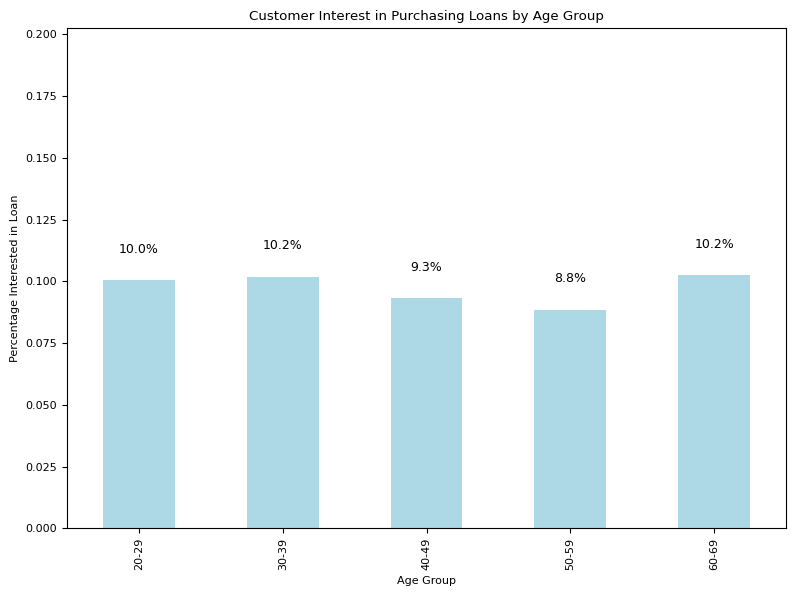

In [493]:
# Create age bins
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
personal_loan_df['AgeGroup'] = pd.cut(personal_loan_df['Age'], bins=bins, labels=labels, right=False)

# Calculate mean interest by age group
loan_interest_by_age = personal_loan_df.groupby('AgeGroup')['Personal_Loan'].mean()

# Print results
print("Loan Interest by Age Group")
print("-" * 60)
for age_group, percentage in loan_interest_by_age.items():
    print(f"Age Group: {age_group}, percentage: {round(percentage *100,2)}%")
print("-" * 60)

# Plot
ax = loan_interest_by_age.plot(kind='bar', color='lightblue', figsize=(8, 6))
plt.xlabel('Age Group')
plt.ylabel('Percentage Interested in Loan')
plt.title('Customer Interest in Purchasing Loans by Age Group')

# Add labels on top of each bar
for i, val in enumerate(loan_interest_by_age):
    plt.text(i, val + 0.01, f"{val*100:.1f}%", ha='center', va='bottom', fontsize=9)

plt.ylim(0, loan_interest_by_age.max() + 0.1)  # Add space above bars
plt.tight_layout()
plt.show()

---

**Observations**

There is no significant difference in interest for personal loan among based on age group.

---

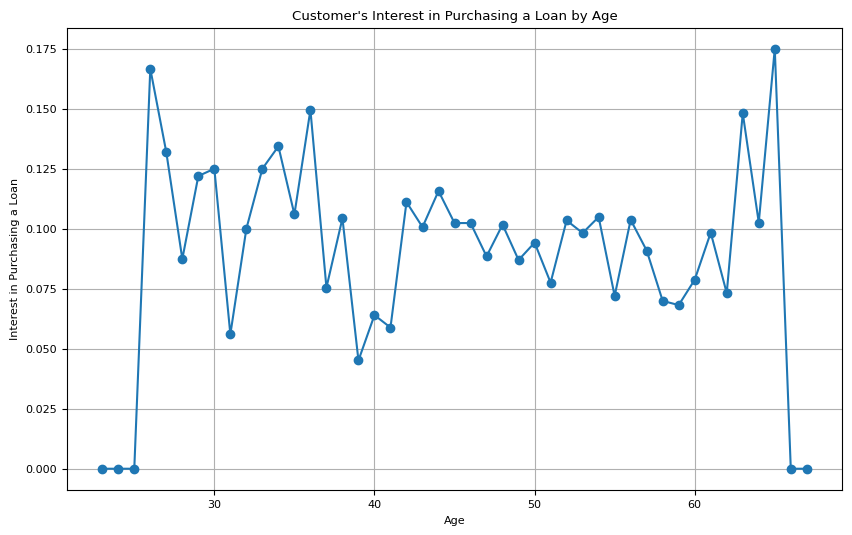

In [494]:
# Group by age and calculate the mean interest in purchasing a loan.
age_interest_df = personal_loan_df.groupby('Age')['Personal_Loan'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(age_interest_df['Age'], age_interest_df['Personal_Loan'], marker='o')

# Add labels and title.
plt.title("Customer's Interest in Purchasing a Loan by Age")
plt.xlabel('Age')
plt.ylabel('Interest in Purchasing a Loan')
plt.grid(True)
plt.show()

---

#### **Question 5.** How does a customer's interest in purchasing a loan vary with their education?

Loan Interest by Education Level
------------------------------------------------------------
Education Level: 1, percentage: 4.44%
Education Level: 2, percentage: 12.97%
Education Level: 3, percentage: 13.66%
------------------------------------------------------------


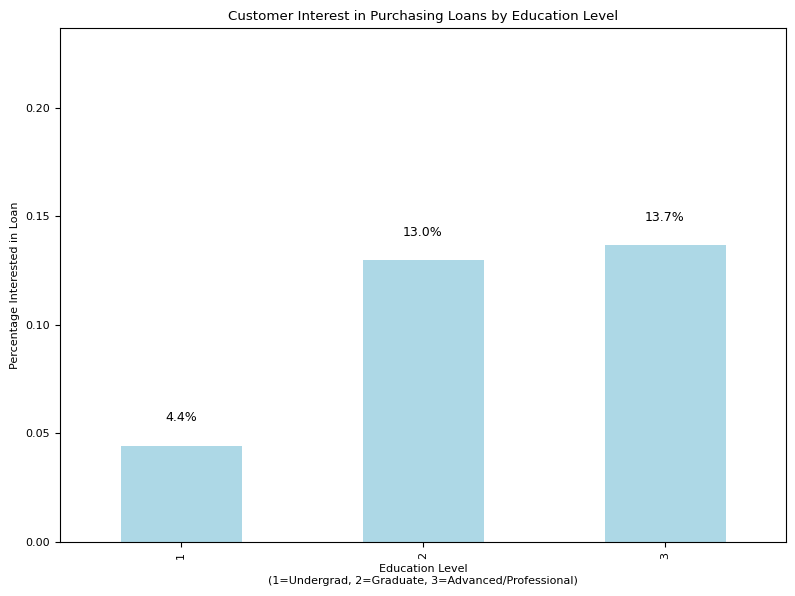

In [498]:
# Calculate the proportion of customers interested in loans for each education level
loan_interest_by_education = personal_loan_df.groupby('Education')['Personal_Loan'].mean()

# Print proportion of customers interested in loans by education level
# 1: Undergrad; 2: Graduate; 3: Advanced/Professional
print("Loan Interest by Education Level")
print("-" * 60)
for education_level, percentage in loan_interest_by_education.items():
    print(f"Education Level: {education_level}, percentage: {round(percentage*100,2)}%")
print("-" * 60)

# Plot
ax = loan_interest_by_education.plot(kind='bar', color='lightblue', figsize=(8, 6))
plt.xlabel('Education Level\n(1=Undergrad, 2=Graduate, 3=Advanced/Professional)')
plt.ylabel('Percentage Interested in Loan')
plt.title('Customer Interest in Purchasing Loans by Education Level')

# Add labels on top of each bar
for i, val in enumerate(loan_interest_by_education):
    plt.text(i, val + 0.01, f"{val*100:.1f}%", ha='center', va='bottom', fontsize=9)

plt.ylim(0, loan_interest_by_education.max() + 0.1)  # Add space above bars
plt.tight_layout()
plt.show()

**Observations**
* Undergraduates at 4.44% is a very low percentrage interested in loans.
* Both Graduates (12.97%) and Advanced/Professionals (13.66%) are more interested in personal loans.

# Data Processing


* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)


## Feature Engineering

In [499]:
# Drop columns that are not needed in the model building
if 'ID' in personal_loan_df.dtypes:
  personal_loan_df.drop(['ID'], axis = 1, inplace = True)
if 'AgeGroup' in personal_loan_df.dtypes:
  personal_loan_df.drop(['AgeGroup'], axis = 1, inplace = True)

personal_loan_df.head(10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   
5   37          13      29    92121       4    0.4          2       155   
6   53          27      72    91711       2    1.5          2         0   
7   50          24      22    93943       1    0.3          3         0   
8   35          10      81    90089       3    0.6          2       104   
9   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

## Outlier Detection

In [502]:
# User-defined functions
def show_boxplot_outliers(data, num_cols):
    """
    Displays boxplots for each numeric column and annotates the median value.

    Parameters:
    data (DataFrame): The dataset
    num_cols (list): List of numeric columns
    """
    num_plots = len(num_cols)
    fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(14, 5 * ((num_plots + 1) // 2)))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.boxplot(data=data, y=col, ax=axes[i], color='skyblue')

        # Calculate and annotate the median
        median_val = data[col].median()
        axes[i].axhline(median_val, color='red', linestyle='--', linewidth=1)
        axes[i].text(0, median_val, f'Median: {median_val:.2f}',
                     color='red', va='center', ha='left', fontsize=9, backgroundcolor='white')

        axes[i].set_title(f'Boxplot of {col}')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

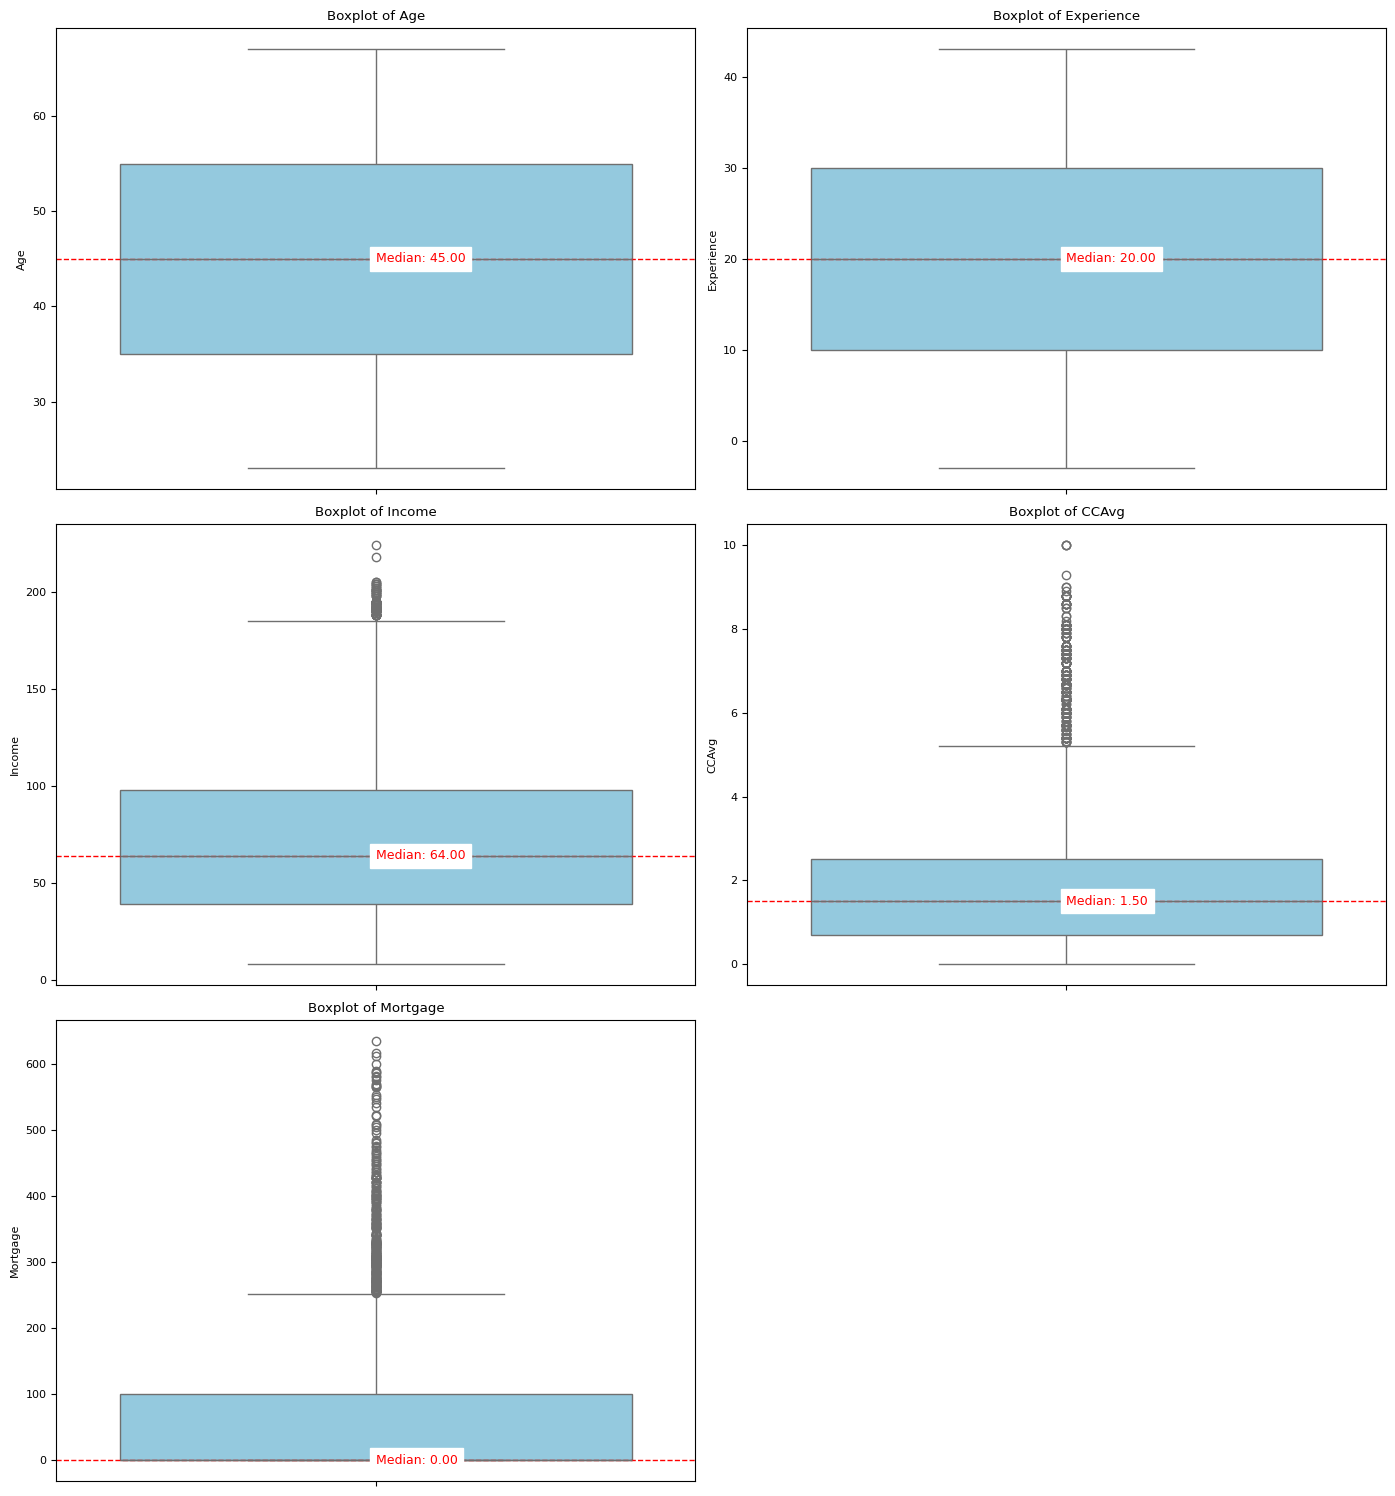

In [503]:
# Display if there are outliers in the numerical columns


# Create a list of all categorical columns and numerical columns for additional analysis
cat_cols = ['ZIPCode', 'Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


show_boxplot_outliers(data = personal_loan_df, num_cols = num_cols)

**Observations**

1. Income, CCAvg and Mortgage has plenty of outliers.
2. These outliers will not be treated as they are considered valid values.



In [504]:
# Check for unique values in the dataset.
personal_loan_df.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

#### Experience

In [506]:
# Find the unqiue numbers and count of unique values in the Experience column.
print('Unique values for Experience: ' + str(personal_loan_df['Experience'].unique()) + '\n')
print('Number of unique values in Experience:', personal_loan_df['Experience'].nunique())

Unique values for Experience: [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

Number of unique values in Experience: 47


In [507]:
# Check for negative values in the Experience column.
print('Current nagative values: ' + str(personal_loan_df[personal_loan_df['Experience'] < 0]['Experience'].unique()))
print('Number of negative values: ' + str(personal_loan_df[personal_loan_df['Experience'] < 0]['Experience'].nunique()))

# Replace negative values in the Experience column.
personal_loan_df['Experience'].replace(-1, 1, inplace=True)
personal_loan_df['Experience'].replace(-2, 2, inplace=True)
personal_loan_df['Experience'].replace(-3, 3, inplace=True)

print('Unique values for Experience: \n' + str(personal_loan_df['Experience'].unique()) + '\n')
print('Number of unique values in Experience:', personal_loan_df['Experience'].nunique())

Current nagative values: [-1 -2 -3]
Number of negative values: 3
Unique values for Experience: 
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 34  0 38 40 33  4 42 43]

Number of unique values in Experience: 44


In [508]:
# Create independent variable
x = personal_loan_df.drop(['Personal_Loan'], axis = 1)
x


Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0      25           1      49    91107       4    1.6          1         0   
1      45          19      34    90089       3    1.5          1         0   
2      39          15      11    94720       1    1.0          1         0   
3      35           9     100    94112       1    2.7          2         0   
4      35           8      45    91330       4    1.0          2         0   
...   ...         ...     ...      ...     ...    ...        ...       ...   
4995   29           3      40    92697       1    1.9          3         0   
4996   30           4      15    92037       4    0.4          1        85   
4997   63          39      24    93023       2    0.3          3         0   
4998   65          40      49    90034       3    0.5          2         0   
4999   28           4      83    92612       3    0.8          1         0   

      Securities_Account  CD_Account  Online  CreditCard  
0                      1           0       0           0  
1                      1           0       0           0  
2                      0           0       0           0  
3                      0           0       0           0  
4                      0           0       0           1  
...                  ...         ...     ...         ...  
4995                   0           0       1           0  
4996                   0           0       1           0  
4997                   0           0       0           0  
4998                   0           0       1           0  
4999                   0           0       1           1  

[5000 rows x 12 columns]

In [509]:
# Create dependent variable
y = personal_loan_df['Personal_Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal_Loan, Length: 5000, dtype: int64

In [510]:

# Split train and test data
x_train, x_test, y_train, y_test = sms.train_test_split(x, y, test_size = 0.3, random_state = 1)

In [511]:
# Display the shape of train data
x_train.shape

(3500, 12)

In [512]:
# Display the shape of test data
x_test.shape


(1500, 12)

In [513]:
# Display the percentage of classes in train data
y_train.value_counts(normalize = True)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

In [514]:
# Display the percentage of classes in test data
y_test.value_counts(normalize = True)

0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


**Observations:**

1. The training set has a shape of 3,500 rows with 15 columns, while the testing set has a shape of 1,500 rows with 15 columns.
2. It shows that close to 90% of observations belongs to class 0 (not take a loan) and less than 10% observations belongs to class 1 (take a loan), and this is preserved in the train and test sets.

## Model Building

In [544]:
# User-defined functions
def get_model_perf_class_sklearn(model, predictors, target):
  '''
  Description: Function to compute different metrics to check classification model performance
  Parameters:
    model: sklearn.tree.DecisionTreeClassifier, required
      The DataFrame of the two-dimensional tabular data
    predictors: pandas.core.frame.DataFrame, required
      The DataFrame of the independent variables
    target: str, required
      The depedent variable
  '''
  # Predict using the independent variables
  pred = model.predict(predictors)

  # Compute accuracy
  acc = smt.accuracy_score(target, pred)

  # Compute recall
  recall = smt.recall_score(target, pred)

  # Compute precision
  precision = smt.precision_score(target, pred)

  # Compute F1-score
  f1 = smt.f1_score(target, pred)

  # Create a DataFrame of metrics
  df_perf = pd.DataFrame({'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1, }, index = [0],)

  return df_perf

def show_confusion_matrix_sklearn(model, predictors, target, figsize = (6, 4)):
  '''
  Description: Function to plot the confusion matrix with percentages
  Parameters:
    model: sklearn.tree.DecisionTreeClassifier, required
      The DataFrame of the two-dimensional tabular data
    predictors: pandas.core.frame.DataFrame, required
      The DataFrame of the independent variables
    target: str, required
      The depedent variable
  '''
  # Predict using the independent variables
  y_pred = model.predict(predictors)

  # Create confusion matrix
  cm = smt.confusion_matrix(target, y_pred)
  labels = np.asarray(
    [
        ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
        for item in cm.flatten()
    ]
  ).reshape(2, 2)

  plt.figure(figsize = figsize)

  ax = sns.heatmap(cm, annot = labels, fmt = '')
  ax.set_title('Confusion Matrix', fontsize = 11)

  plt.ylabel('True label')
  plt.xlabel('Predicted label')

def show_feature_importance(importances, indices, feature_names):
  '''
  Description: Function to plot the features in the order of importance
  Parameters:
    importances: sklearn.tree.DecisionTreeClassifier, required
      The DataFrame of the two-dimensional tabular data
    indices: numpy.ndarray, required
      The indices of array
    feature_names: list, required
      The column names of features
  '''
  plt.figure(figsize = (11.75, 5))
  plt.title('Feature Importances', fontsize = 11)
  plt.barh(range(len(indices)), importances[indices], color = 'lightblue', align = 'center')
  plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

def show_decision_tree(decision_tree, feature_names, figsize = (20, 10)):
  '''
  Description: Function to plot the features in the order of importance
  Parameters:
    model: sklearn.tree.DecisionTreeClassifier, required
      The DataFrame of the two-dimensional tabular data
    feature_names: list, required
      The column names of features
    figsize: tuple, optional
      The figure size in inches, default: (20, 10)
  '''
  plt.figure(figsize = figsize)
  plt.suptitle('Decision Tree', y = 0.9, size = 17)

  out = ste.plot_tree(
      decision_tree = decision_tree,
      feature_names = feature_names,
      filled = True,
      fontsize = 9,
      node_ids = False,
      class_names = None
  )

  # Display Decision Tree
  for o in out:
      arrow = o.arrow_patch
      if arrow is not None:
          arrow.set_edgecolor('black')
          arrow.set_linewidth(1)

  plt.show()

## Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will accept a loan, but in reality the customer would not accept a loan (False Negative).
2. Predicting a customer will not accept a loan, but in reality the customer would have accepted a loan (False Positive).

**Which case is more important?**

1. Second case if more important (False Positive). The main goal of the campain is to identify customers to who will accept a loan.
2. If we predict that a customer will not accept a loan, but will actually accept a loan, it will be a loss of opportunity for the bank to increase its loan customers.
3. If we predict that a customer will accept a loan, but will not actually accept a loan, the bank will have to bear the cost of resources/ operations in identifying potential loan customers. (To minimize false negative, Recall should be maximized, the greater the Recall, higher the chances of minimizing the False Negatives.)


### Decision Tree (without class_weight)

In [516]:

# Create Decision Tree model without class_weight
model_wo_class_weight = ste.DecisionTreeClassifier(criterion="gini", random_state = 1)
model_wo_class_weight.fit(x_train, y_train)



DecisionTreeClassifier(random_state=1)

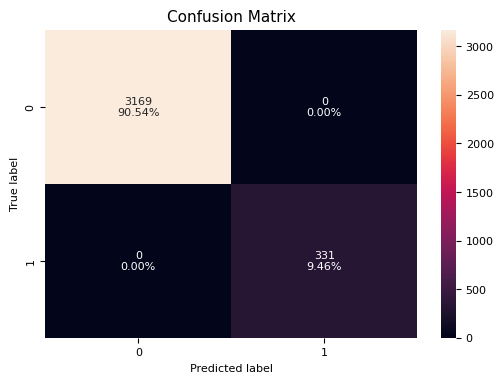

In [517]:
# Display the confision matrix of train data without weight_class
show_confusion_matrix_sklearn(model = model_wo_class_weight, predictors = x_train, target = y_train)

In [518]:

# Display the model performance of train data without weight_class
decision_tree_perf_train_wo_class_weight = get_model_perf_class_sklearn(model = model_wo_class_weight, predictors = x_train, target = y_train)
decision_tree_perf_train_wo_class_weight

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Model testing on Testing Set

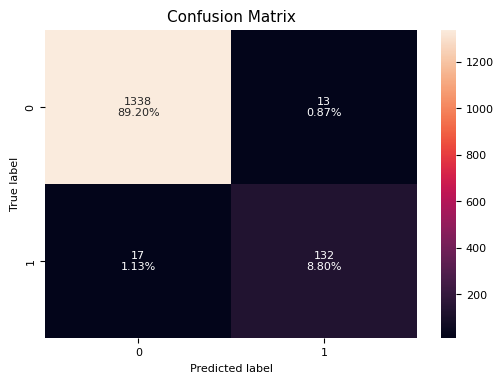

In [519]:
# Display the confision matrix of test data without weight_class
show_confusion_matrix_sklearn(model = model_wo_class_weight, predictors = x_test, target = y_test)

In [520]:
# Display the model performance of test data without weight_class
decision_tree_perf_test_wo_class_weight = get_model_perf_class_sklearn(model = model_wo_class_weight, predictors = x_test, target = y_test)
decision_tree_perf_test_wo_class_weight


Accuracy    Recall  Precision        F1
0      0.98  0.885906   0.910345  0.897959

In [522]:
# Create list of columns for pruning
feature_names = list(x_train.columns)
feature_names

['Age',
 'Experience',
 'Income',
 'ZIPCode',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

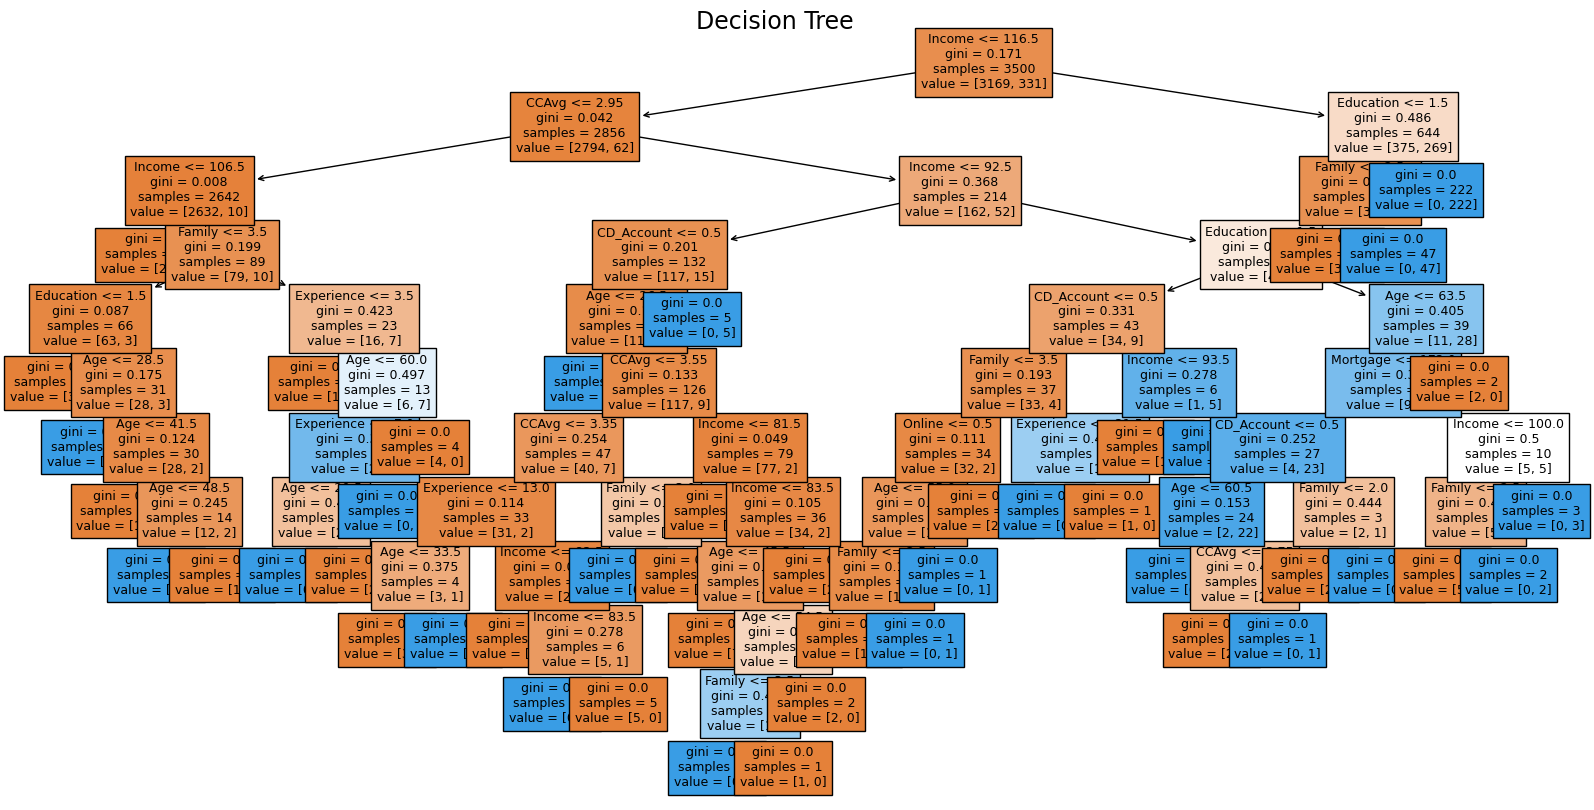

In [523]:

show_decision_tree(decision_tree = model_wo_class_weight, feature_names = feature_names)

**Observations on Decision Tree model (without class_weight)**

1. Both training and testing sets have less than 10% positive classes. This shows that accuracy is not a good metric to evaluate this model.
2. The performance of the model shows a big disparity between the training and testing sets which indicates that the model is overfitting.
3. The accuracy, recall, precision and F1 score has a value of 1.0 for the training set which also indicates that the model is overfitting.
4. The hyperparameter class_weight can be utilized to adjust the weighting calculations of the model.




### Decision Tree (with class_weight)
**Create Decision Tree model**

* If the frequency of class 1 is 10% and the frequency of class 0 is 90%, then class 0 will become the dominant class and the Decision Tree will be more biased toward the dominant classes.
* In this case, we will set the following Hyperparameter in the DecisionTreeClassifier. This will automatically adjust the weights to be inversely proportional to the class frequencies in the input data:
class_weight = balanced



In [526]:
# Create Decision Tree model with class_weight
model_w_class_weight = ste.DecisionTreeClassifier(random_state = 1, criterion="gini",class_weight = 'balanced')
model_w_class_weight.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

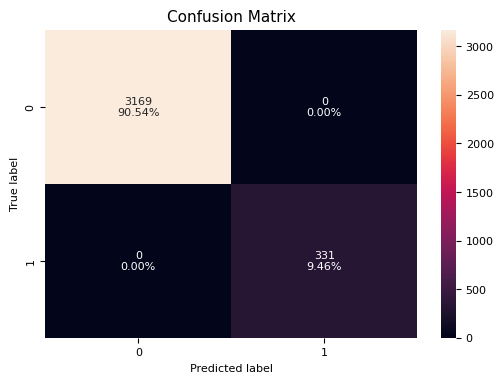

In [527]:
# Display the confision matrix of train data with weight_class
show_confusion_matrix_sklearn(model = model_w_class_weight, predictors = x_train, target = y_train)

In [528]:
# Display the model performance of train data with weight_class
decision_tree_perf_train_w_class_weight = get_model_perf_class_sklearn(model = model_w_class_weight, predictors = x_train, target = y_train)
decision_tree_perf_train_w_class_weight

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Model testing on Testing Set

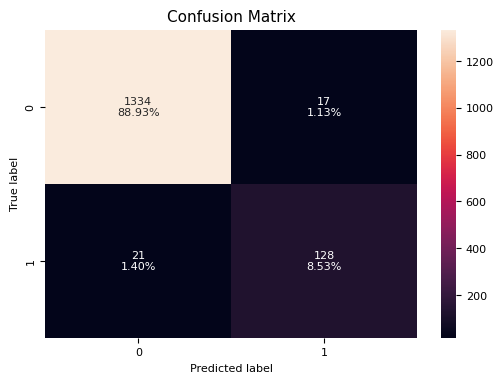

In [529]:
# Display the confision matrix of test data with weight_class
show_confusion_matrix_sklearn(model = model_w_class_weight, predictors = x_test, target = y_test)

In [530]:
# Display the model performance of test data with weight_class
decision_tree_perf_test_w_class_weight = get_model_perf_class_sklearn(model = model_w_class_weight, predictors = x_test, target = y_test)

decision_tree_perf_test_w_class_weight

Accuracy   Recall  Precision        F1
0  0.974667  0.85906   0.882759  0.870748

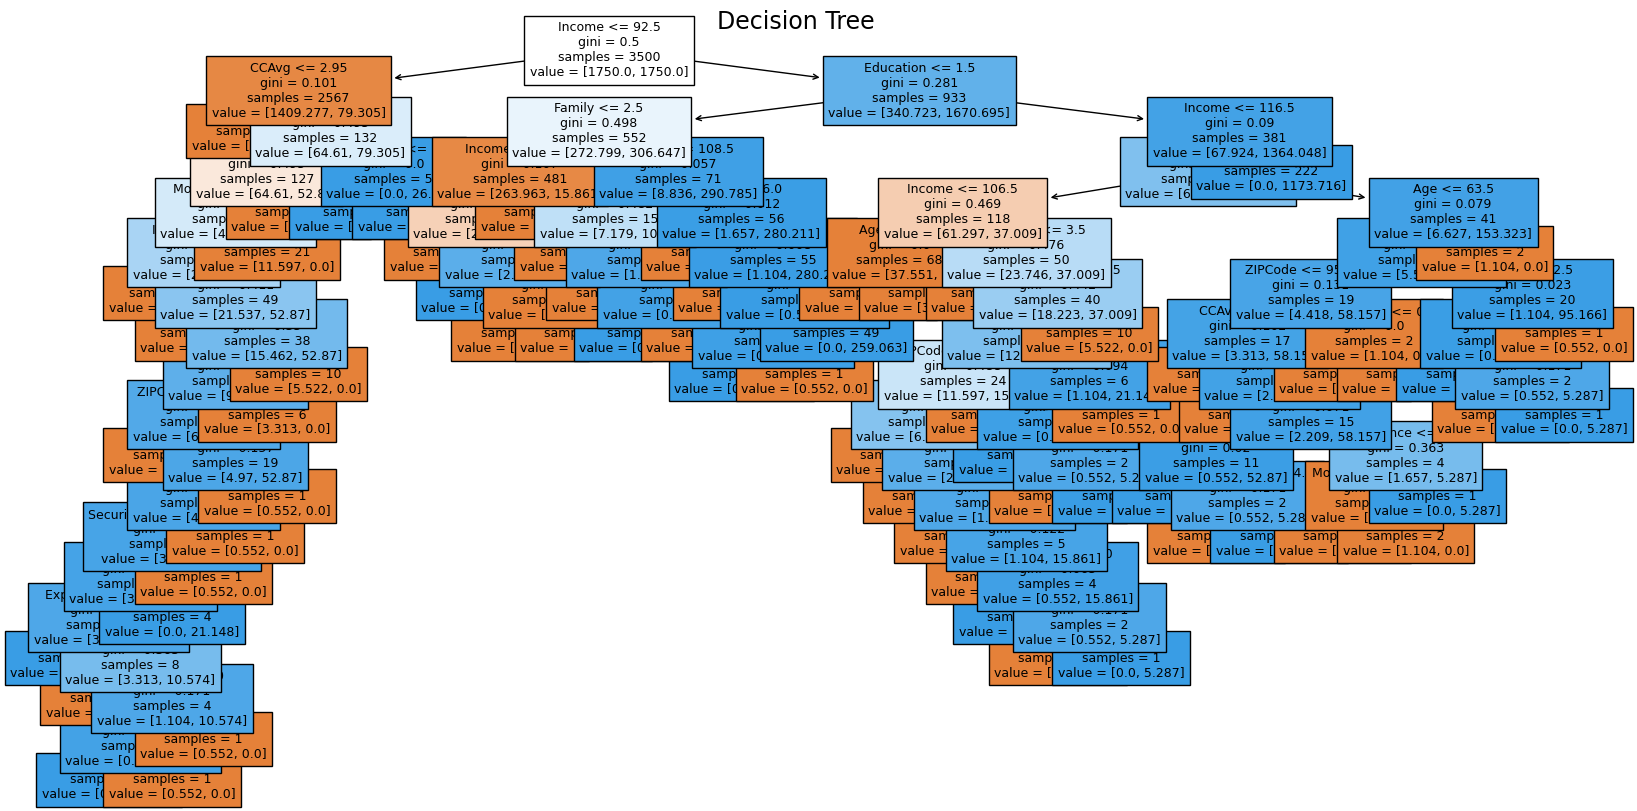

In [531]:

show_decision_tree(decision_tree = model_w_class_weight, feature_names = feature_names)

**Observations on Decision Tree model (with class_weight)**

1. The performance of the model still shows a big difference between the training and testing sets which indicates that the model is still overfitting.
2. The accuracy, recall, precision and F1 score still has a value of 1.0 for the training set which indicates that the model is still overfitting.
3. Using the hyperparameter class_weight = 'balanced' did not improve the performance of the model. Thus, it needs more analysis and experimentation such as Hyperparameter tuning.




### Decision Tree (Pre-pruning)
**Create Decision Tree model**

1. Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the Hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e. we will use GridSearchCV.
2. GridSearchCV is a tuning technique that attempts to compute the optimum values of Hyperparameters.
3. It performs an exhaustive search on specific parameter values of a model.
4. The parameters of the estimator/ model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.



In [532]:
# Create Decision Tree model with pre-pruning
model_pre_prune = ste.DecisionTreeClassifier(criterion="gini",random_state = 1)

# Define hyperparameters
parameters = {
  'class_weight': [{0: 0.15, 1: 0.85}],
  'max_depth': list(np.arange(1, 15)) + [None],
  'max_leaf_nodes': [50, 75, 150, 250],
  'min_samples_split': [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = smt.make_scorer(smt.recall_score)

# Run the grid search
grid_obj = sms.GridSearchCV(model_pre_prune, parameters, scoring = acc_scorer, cv = 5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the model to the best combination of parameters
model_pre_prune = grid_obj.best_estimator_

# Fit the best algorithm to the data
model_pre_prune.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=3,
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

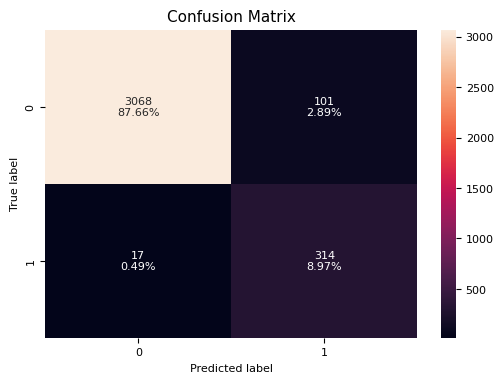

In [533]:
# Display the confision matrix of train data with pre-pruning
show_confusion_matrix_sklearn(model = model_pre_prune, predictors = x_train, target = y_train)


In [534]:
# Display the model performance of train data with pre-pruning
decision_tree_perf_train_pre_prune = get_model_perf_class_sklearn(model = model_pre_prune, predictors = x_train, target = y_train)

decision_tree_perf_train_pre_prune

Accuracy   Recall  Precision        F1
0  0.966286  0.94864   0.756627  0.841823

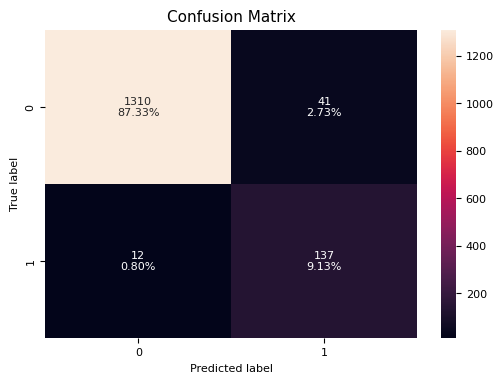

In [535]:
# Display the confision matrix of test data with pre-pruning
show_confusion_matrix_sklearn(model = model_pre_prune, predictors = x_test, target = y_test)

In [536]:
# Display the model performance of test data with pre-pruning
decision_tree_perf_test_pre_prune = get_model_perf_class_sklearn(model = model_pre_prune, predictors = x_test, target = y_test)

decision_tree_perf_test_pre_prune

Accuracy    Recall  Precision       F1
0  0.964667  0.919463   0.769663  0.83792

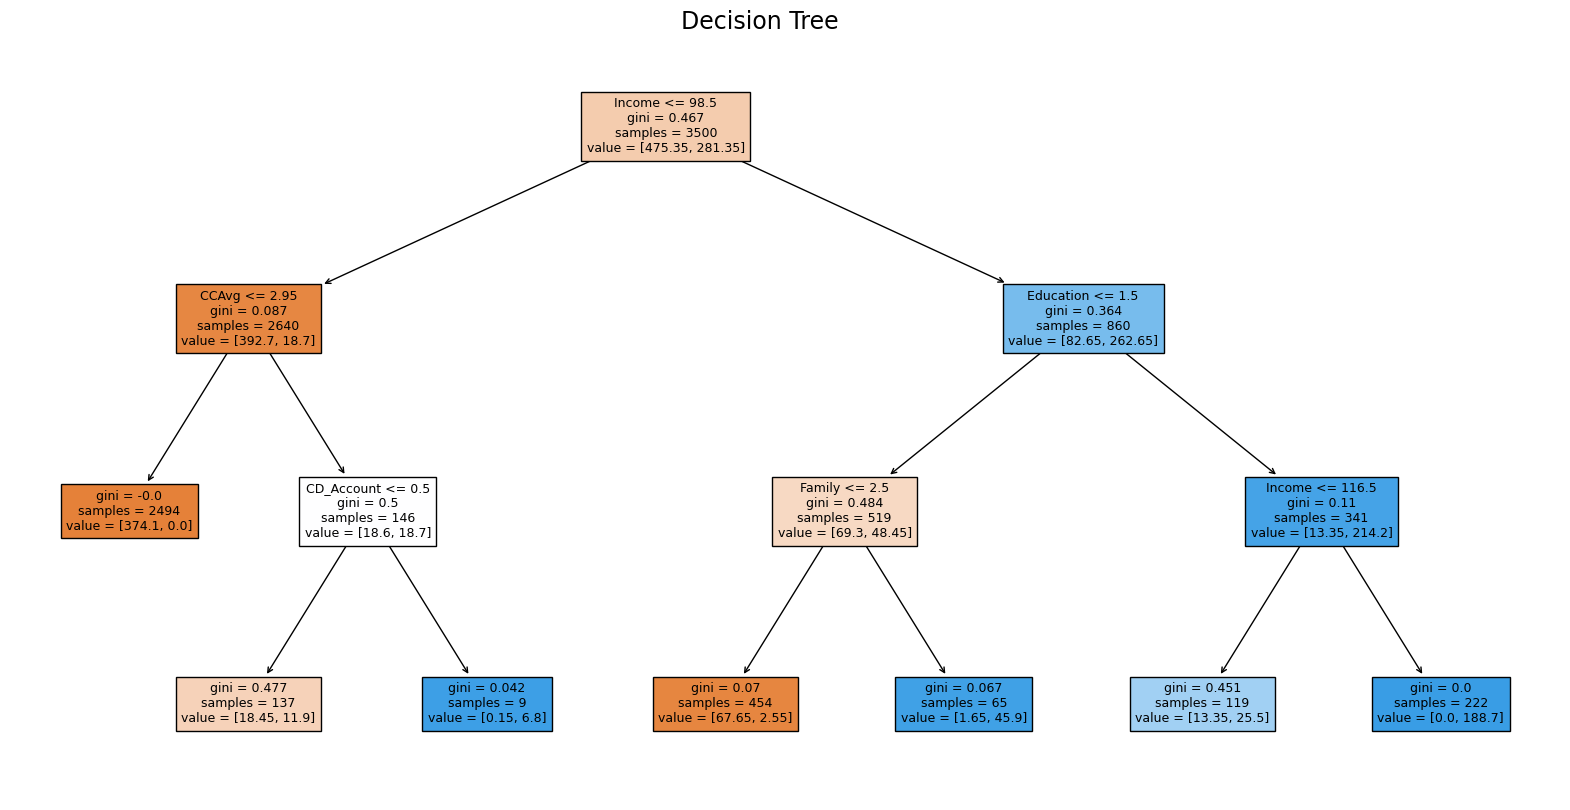

In [538]:
# Display the Decision Tree with pre-pruning
show_decision_tree(decision_tree = model_pre_prune, feature_names = feature_names)

In [541]:
# Display Decision Tree with pre-pruning as text
print(ste.export_text(model_pre_prune, feature_names = feature_names, show_weights = True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [18.45, 11.90] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.15, 6.80] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.35, 25.50] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1



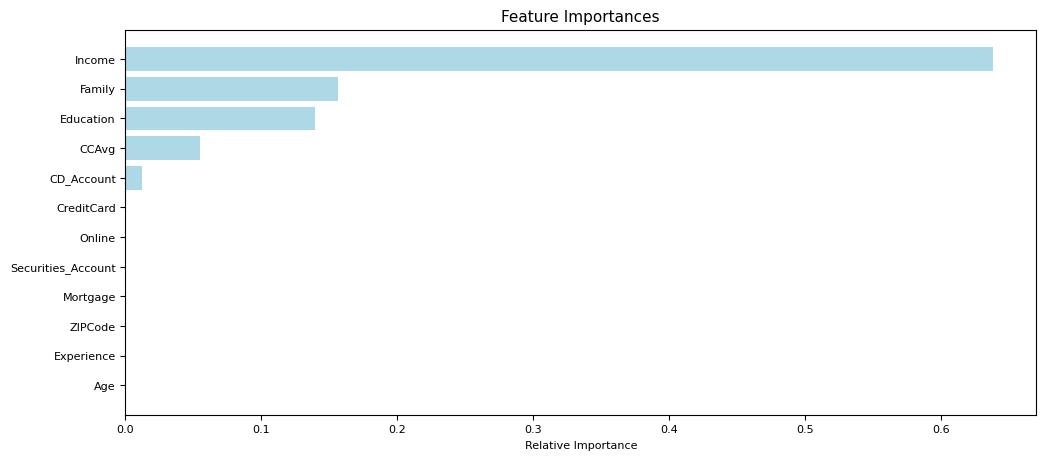

In [545]:
# Display feature importance with pre-pruning
show_feature_importance(importances = importances_pre_prune, indices = indices_pre_prune, feature_names = feature_names)


**Observations on Decision Tree model (Pre-pruning)**

* The performance of the model shows improvement on the recall score (96.64%)

of the testing set after using the following:
- GridSearchCV Hyperparameters:
  - random_state = 1  
  - class_weight = [{0: 0.15, 1: 0.85}]
  - max_depth = [np.arange(1, 15, 2), None]
  - max_leaf_nodes = [50, 75, 150, 250]
  - min_samples_split = [10, 30, 50, 70]
- Estimator/ DecisionTreeClassifier Hyperparameters:
  - random_state = 1
  - class_weight = {0: 0.15, 1: 0.85}
  - max_leaf_nodes = 50
  - min_samples_split = 50
* The model has started to show a generalized result since the recall scores in training and testing sets are coming to a closer value:
- Recall for training set = 99.09%
- Recall for testing set = 96.64%
- The Decision Tree shows there are 21 decision path.
- The Decision Tree shows that when a customer meets the following conditions, is likely going to accept the loan:
   - Income is greater than 106.5K and less than or equal 116.5K
   - Education level is greater than 1
   - CCAvg is less than or equal 2.8K
   - Experience is less than or equal 31 1/2 years
- Feature importance shows the most important factor to customers when accepting a loan is Income (close to 0.63). List if followed by:
     - Family (close to 0.15)
     - Education (close to 0.13)
     - CCAvg (close to 0.08)
     - CD_Account (close to 0.01)




**Decision Tree (Post-pruning)**
Create Decision Tree model (with Cost Complexity Pruning)

* Minimal cost complexity pruning recursively finds the node with the weakest link. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first.
* To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process.
* As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.



In [546]:
# Obtain cost complexity pruning path
model_post_prune = ste.DecisionTreeClassifier(random_state = 1, criterion="gini", class_weight = {0: 0.15, 1: 0.85})

path = model_post_prune.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

# Display effective alphas and total impurities
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -7.934295e-15
1   7.482671e-19 -7.933546e-15
2   8.803143e-19 -7.932666e-15
3   4.071454e-18 -7.928595e-15
4   6.998499e-18 -7.921596e-15
5   7.042514e-18 -7.914554e-15
6   9.478050e-18 -7.905076e-15
7   1.166416e-17 -7.893411e-15
8   1.143528e-16 -7.779059e-15
9   1.218179e-15 -6.560880e-15
10  1.872164e-04  3.744328e-04
11  1.898533e-04  7.541394e-04
12  1.964954e-04  1.147130e-03
13  1.975713e-04  1.542273e-03
14  2.531377e-04  2.301686e-03
15  3.182679e-04  2.938222e-03
16  3.369896e-04  3.275211e-03
17  3.489195e-04  3.624131e-03
18  3.643130e-04  3.988444e-03
19  3.744328e-04  4.362877e-03
20  3.835686e-04  5.130014e-03
21  3.879017e-04  5.517916e-03
22  3.912346e-04  6.300385e-03
23  5.208020e-04  6.821187e-03
24  5.569668e-04  7.935120e-03
25  7.040048e-04  9.343130e-03
26  8.576797e-04  1.191617e-02
27  9.404360e-04  1.285661e-02
28  9.407728e-04  1.473815e-02
29  9.951370e-04  1.672842e-02
30  1.011155e-03  1.773958e-02
31  1.086501e-03  1.882608e-02
32  1.096425e-03  2.101893e-02
33  1.242301e-03  2.474583e-02
34  1.315081e-03  2.606091e-02
35  1.434181e-03  2.749510e-02
36  1.619124e-03  2.911422e-02
37  1.638043e-03  3.075226e-02
38  1.717019e-03  3.246928e-02
39  2.289245e-03  3.475853e-02
40  2.742431e-03  3.750096e-02
41  3.335999e-03  4.083696e-02
42  3.527226e-03  4.436418e-02
43  5.138280e-03  4.950246e-02
44  9.008434e-03  5.851090e-02
45  1.005479e-02  6.856568e-02
46  2.253222e-02  9.109791e-02
47  6.112098e-02  2.133399e-01
48  2.537957e-01  4.671356e-01

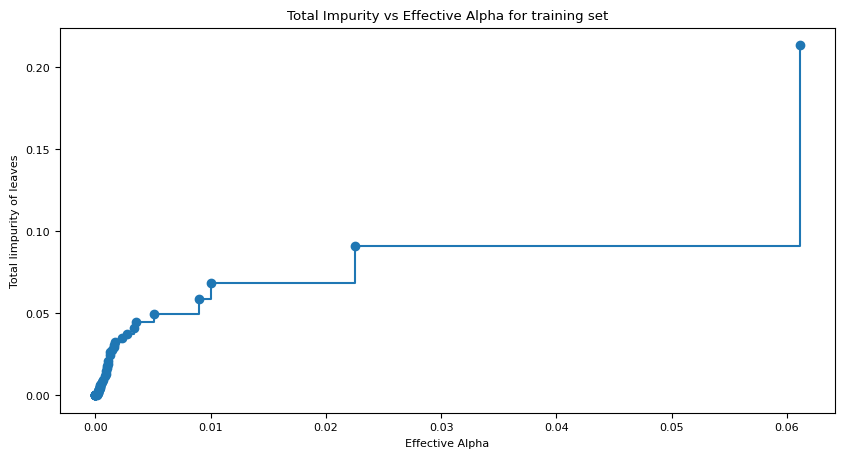

In [547]:
# Display effective alphas with regards to total impurities
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')
ax.set_title('Total Impurity vs Effective Alpha for training set')

ax.set_xlabel('Effective Alpha')
ax.set_ylabel('Total Iimpurity of leaves')

plt.show()


In [548]:
# Create list of Decision Tree model with post-pruning
model_post_prune_list = []
for ccp_alpha in ccp_alphas:
    model_post_prune = ste.DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.15, 1: 0.85}, ccp_alpha = ccp_alpha)
    model_post_prune.fit(x_train, y_train)
    model_post_prune_list.append(model_post_prune)

print('Number of nodes in the last tree is: {} with ccp_alpha: {}'.format(model_post_prune_list[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.25379571489480873


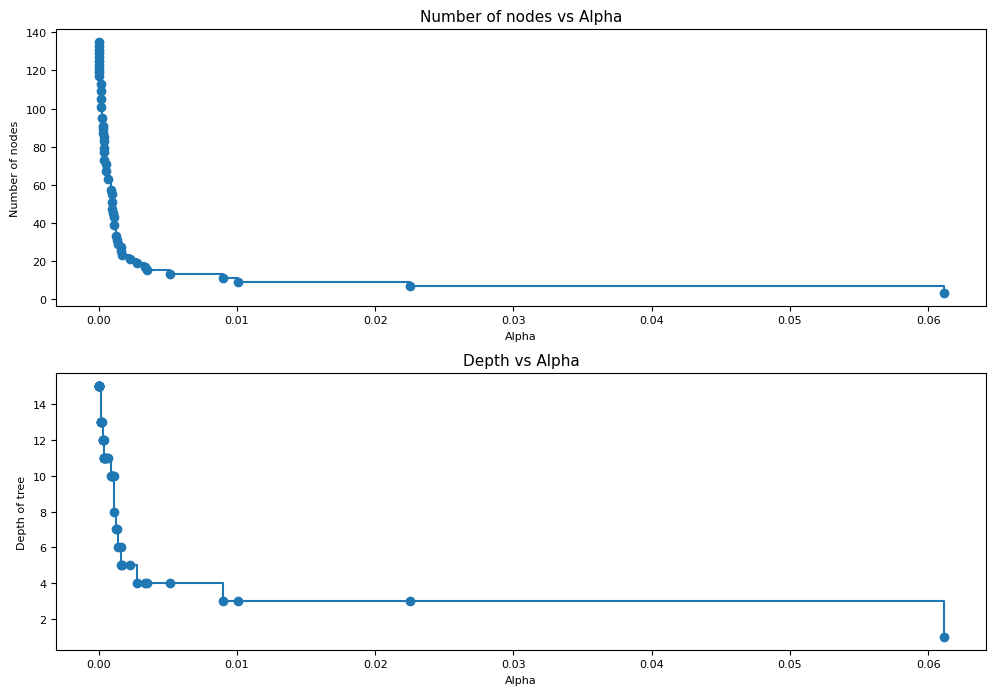

In [549]:
# Remove the last element in the models and effective alphas
model_post_prune_list = model_post_prune_list[:-1]
ccp_alphas = ccp_alphas[:-1]

# Display number of nodes and tree depth as alpha increases
node_counts = [model_post_prune.tree_.node_count for model_post_prune in model_post_prune_list]
depth = [model_post_prune.tree_.max_depth for model_post_prune in model_post_prune_list]
fig, ax = plt.subplots(2, 1, figsize = (10, 7))

ax[0].plot(ccp_alphas, node_counts, marker = 'o', drawstyle = 'steps-post')
ax[0].set_title('Number of nodes vs Alpha', fontsize = 11)
ax[0].set_ylabel('Number of nodes')
ax[0].set_xlabel('Alpha')

ax[1].plot(ccp_alphas, depth, marker = 'o', drawstyle = 'steps-post')
ax[1].set_title('Depth vs Alpha', fontsize = 11)
ax[1].set_ylabel('Depth of tree')
ax[1].set_xlabel('Alpha')

fig.tight_layout()

In [551]:
# Create list of recall values of train data
recall_train_list = []
for model_post_prune in model_post_prune_list:
  pred_train = model_post_prune.predict(x_train)
  values_train = smt.recall_score(y_train, pred_train)
  recall_train_list.append(values_train)

In [552]:
# Create list of recall values of test data
recall_test_list = []
for model_post_prune in model_post_prune_list:
  pred_test = model_post_prune.predict(x_test)
  values_test = smt.recall_score(y_test, pred_test)
  recall_test_list.append(values_test)

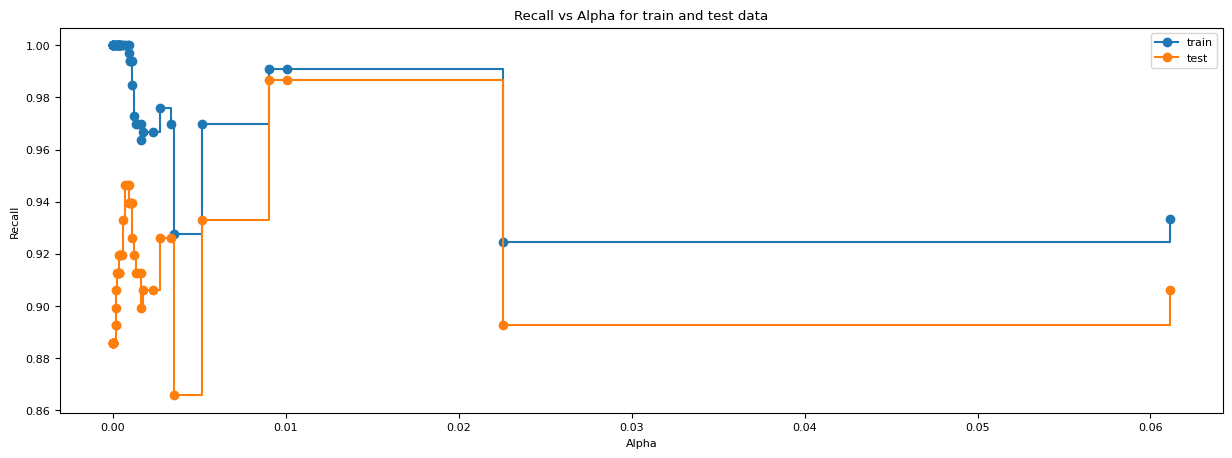

In [554]:
# Display the distribution of Alpha with regards to Recall
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(ccp_alphas, recall_train_list, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, recall_test_list, marker = 'o', label = 'test', drawstyle = 'steps-post')

ax.set_title('Recall vs Alpha for train and test data')
ax.set_ylabel('Recall')
ax.set_xlabel('Alpha')
ax.legend()

plt.show()


**Create Decision Tree model (using best model)**

- We will use np.argmax to get the best suggested model based on the highest recall score from the testing set.
- As shown below, the best suggested model uses the following Hyperparameters:
    - random_state = 1
    - class_weight = {0: 0.15, 1: 0.85}
    - ccp_alpha = 0.00900843430150808



In [556]:
# Create best Decision Tree model with post-pruning
index_model_post_prune = np.argmax(recall_test_list)
model_post_prune_best = model_post_prune_list[index_model_post_prune]
model_post_prune_best

DecisionTreeClassifier(ccp_alpha=0.009008434301508082,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

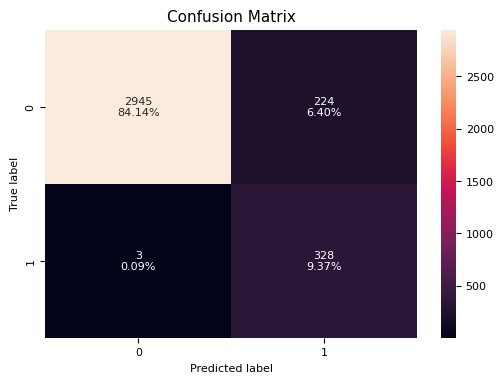

In [557]:
# Display the best confision matrix of train data with post-pruning
show_confusion_matrix_sklearn(model = model_post_prune_best, predictors = x_train, target = y_train)

In [558]:
# Display the best model performance of train data with post-pruning
decision_tree_perf_train_post_prune = get_model_perf_class_sklearn(model = model_post_prune_best, predictors = x_train, target = y_train)
decision_tree_perf_train_post_prune

Accuracy    Recall  Precision        F1
0  0.935143  0.990937   0.594203  0.742922

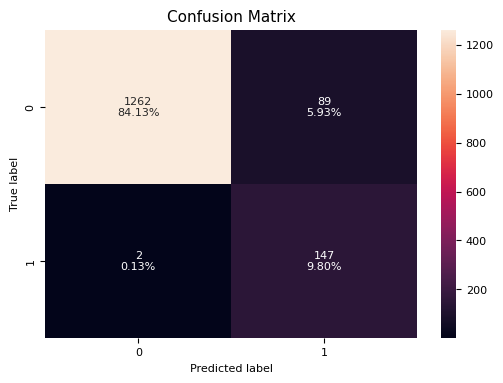

In [559]:
# Display the best confision matrix of test data with post-pruning
show_confusion_matrix_sklearn(model = model_post_prune_best, predictors = x_test, target = y_test)

In [560]:
# Display the best model performance of test data with post-pruning
decision_tree_perf_test_post_prune = get_model_perf_class_sklearn(model = model_post_prune_best, predictors = x_test, target = y_test)
decision_tree_perf_test_post_prune

Accuracy    Recall  Precision        F1
0  0.939333  0.986577   0.622881  0.763636

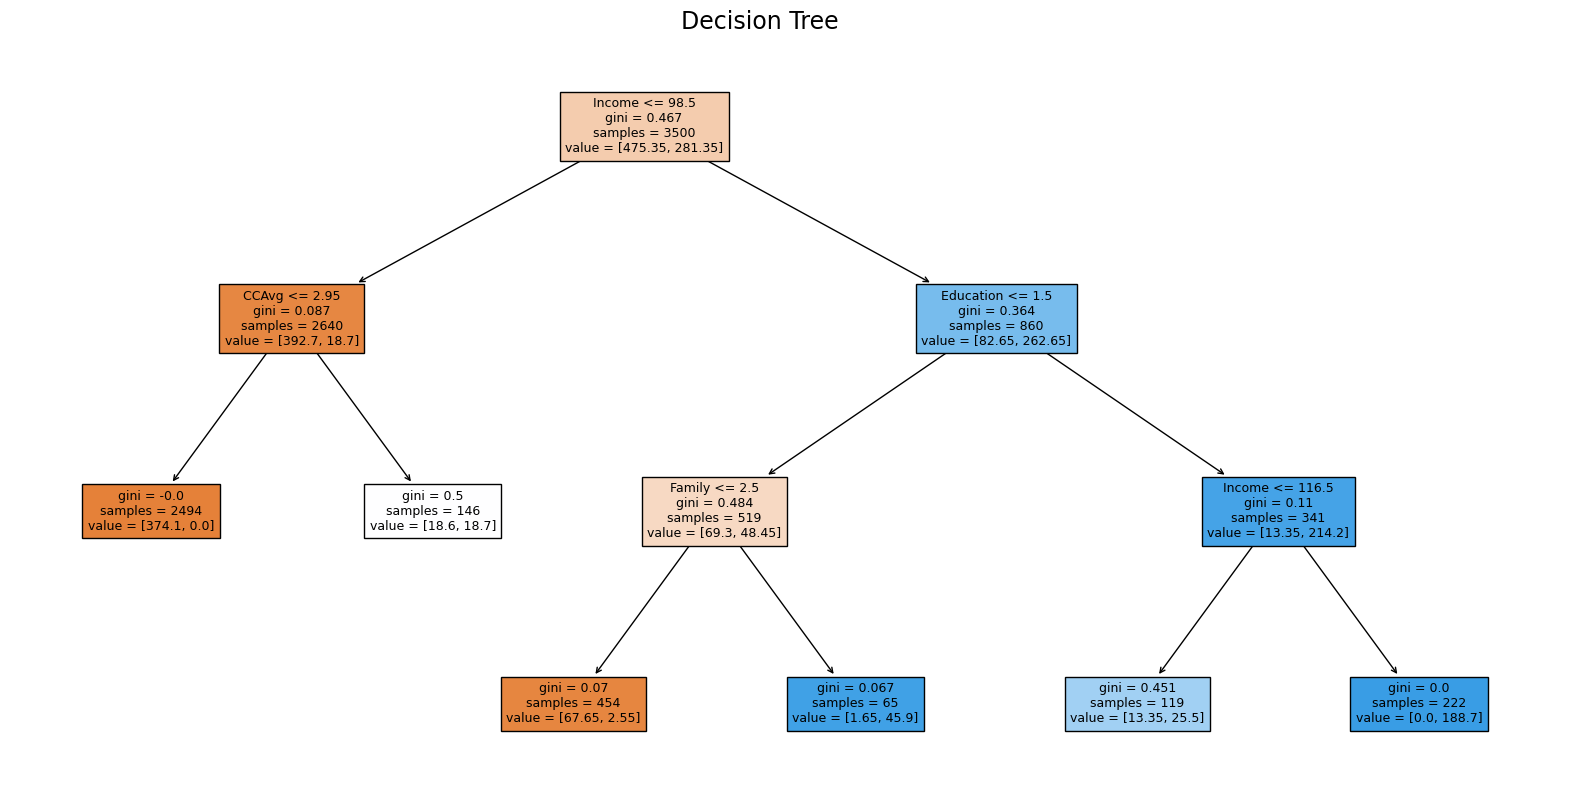

In [561]:
# Display the best Decision Tree with post-pruning
show_decision_tree(decision_tree = model_post_prune_best, feature_names = feature_names)

In [563]:
# Display the best Decision Tree with post-pruning as text
print(ste.export_text(model_post_prune_best, feature_names = feature_names, show_weights = True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.35, 25.50] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1



In [564]:
# Importance of features in the tree building
importances_post_prune = model_post_prune_best.feature_importances_
indices_post_prune = np.argsort(importances_post_prune)
importances_post_prune

array([0.        , 0.        , 0.64570378, 0.        , 0.15824002,
       0.05514161, 0.14091458, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

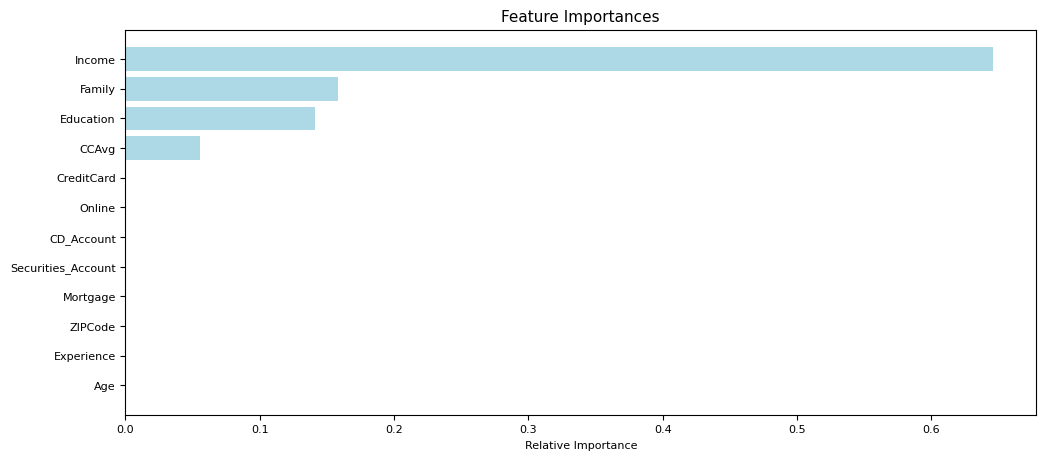

In [565]:
# Display feature importance with post-pruning
show_feature_importance(importances = importances_post_prune, indices = indices_post_prune, feature_names = feature_names)



**Observations on Decision Tree model (Post-pruning)**

* The performance of the model shows more improvement on the recall score (98.66%) of the testing set after using the following:
    - DecisionTreeClassifier Hyperparameters:
        - random_state = 1
        - class_weight = {0: 0.15, 1: 0.85}
        - ccp_alpha = 0.00900843430150808 (from Cost Complexity Pruning)
* The model shows a more generalized result since the recall scores in training and testing sets are coming to a closer value:
    - Recall for training set = 99.07%
    - Recall for testing set = 98.66%
* The Decision Tree shows there are now 6 decision path compared to 21 decision path from the pre-pruned model.
* The Decision Tree shows that when a customer meets the following conditions, is likely going to accept the loan:
    - Income is greater than 116.5K
    - Education level is greater than 1
* Feature importance shows the most important factor to customers when accepting a loan is Income (close to 0.65). List if followed by:
    - Family (close to 0.16)
    - Education (close to 0.14)
    - CCAvg (close to 0.05)


# Model Comparison and Final Model Selection

In [566]:
# Display training performance comparison
df_model_train_comp = pd.concat([
  decision_tree_perf_train_wo_class_weight.transpose(),
  decision_tree_perf_train_w_class_weight.transpose(),
  decision_tree_perf_train_pre_prune.transpose(),
  decision_tree_perf_train_post_prune.transpose(),
  ],
  axis = 1
)
df_model_train_comp.columns = [
  'Decision Tree without class_weight',
  'Decision Tree with class_weight',
  'Decision Tree (Pre-pruning)',
  'Decision Tree (Post-pruning)',
]

df_model_train_comp

Decision Tree without class_weight  \
Accuracy                                  1.0   
Recall                                    1.0   
Precision                                 1.0   
F1                                        1.0   

           Decision Tree with class_weight  Decision Tree (Pre-pruning)  \
Accuracy                               1.0                     0.966286   
Recall                                 1.0                     0.948640   
Precision                              1.0                     0.756627   
F1                                     1.0                     0.841823   

           Decision Tree (Post-pruning)  
Accuracy                       0.935143  
Recall                         0.990937  
Precision                      0.594203  
F1                             0.742922

In [567]:
# Display testing performance comparison
df_model_test_comp = pd.concat([
  decision_tree_perf_test_wo_class_weight.transpose(),
  decision_tree_perf_test_w_class_weight.transpose(),
  decision_tree_perf_test_pre_prune.transpose(),
  decision_tree_perf_test_post_prune.transpose(),
  ],
  axis = 1,
)
df_model_test_comp.columns = [
  'Decision Tree without class_weight',
  'Decision Tree with class_weight',
  'Decision Tree (Pre-pruning)',
  'Decision Tree (Post-pruning)',
]

df_model_test_comp

Decision Tree without class_weight  \
Accuracy                             0.980000   
Recall                               0.885906   
Precision                            0.910345   
F1                                   0.897959   

           Decision Tree with class_weight  Decision Tree (Pre-pruning)  \
Accuracy                          0.974667                     0.964667   
Recall                            0.859060                     0.919463   
Precision                         0.882759                     0.769663   
F1                                0.870748                     0.837920   

           Decision Tree (Post-pruning)  
Accuracy                       0.939333  
Recall                         0.986577  
Precision                      0.622881  
F1                             0.763636


**Key Observations on Model Comparison**

* The Decision Tree models in both Pre-pruning and Post-pruning are giving high recall scores on both training and test sets.
* We will choose the Decision Tree (Post-pruning) model as the best model since it is showing the highest recall score on the training and testing sets than the Decision Tree (Pre-pruning) model.



## Actionable Insights and Business Recommendations

### Conclusions:

- The Decision Tree (Post-pruning) model provides recall score of 99.09% for training set and 98.66% for testing set after using the following Hyperparameters:
    - random_state = 1
    -  class_weight = {0: 0.15, 1: 0.85}
    - ccp_alpha = 0.0090

- The Decision Tree (Post-pruning) model shows that it can be used to predict if a customer is going to accept a loan and can approximately identify 98.66% from the potential loan customers.

- The Decision Tree (Post-pruning) model shows that it can predict 98.66% of the time that the customer will accept a loan if the customer meet the following conditions:
    - Income is greater than 98.5K
    - Education level is less than or equal 1
    - Family size is greater than 2

    OR:
    - Income is greater than 98.5K
    - Education level is greater than 1

    OR:
    - Income is less than or equal 98.5K
    - CCAvg is greater than 2.95K

- Feature importance shows that Income (close to 0.66), Family (close to 0.16), Education (close to 0.14) and CCAvg (close to 0.05) are the most important factors in predicting potential loan customers.

- Hyperparameters and pruning provides great value in tuning your model and to reduce overfitting.

Recommendations:

  - The following customer features need be thoroughly assessed when indentifying potential loan customers:
      1. Income: Majority of the customers who accepted a loan have higher income (mean value close to $145K).
      2. Family: Majority of the customers who accepted a loan have more family members (mean value close to 2.6).
      3. Education: Majority of the customers who accepted a loan have higher education level (mean value close to 2.2).
      4. CCAvg: Majority of the customers who accepted a loan have higher credit card average spending (mean value close to $4K).
  - If possible, offer promotions to attract potential loan customers to take a loan.
  - The bank should use more data for the analysis to get more reliable results such as:
    - More customer records.
    - Additional customer information, e.g. If a customer owns a credit card, or what is the customer's residential status (even if the above criteria is met, if the customer is not planning to stay in the country for a longer period of time, it is still possible that the customer is not going to take a loan due to a short term plan to stay in the country).



### Export to HTML for Submission

In [571]:
!pip install nbconvert
!jupyter nbconvert --to html /content/drive/MyDrive/pgaiml/machine-learning/sivaramkumar_alllife_personal_loan_full_code_final.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/pgaiml/machine-learning/sivaramkumar_alllife_personal_loan_full_code_final.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 55 image(s).
[NbConvertApp] Writing 8504179 bytes to /content/drive/MyDrive/pgaiml/machine-learning/sivaramkumar_alllife_personal_loan_full_code_final.html
